# MultiVelo Fig4

Data for this figure can be found at the links below:

RNA: https://figshare.com/account/projects/164296/articles/22575307

ATAC: https://figshare.com/account/projects/164296/articles/22575313

If you do not download them manually, the notebook will do so automatically.

In [1]:
import os
import scipy
import numpy as np
import pandas as pd
import math
import sys
import multivelo as mv
import scanpy as sc
import scvelo as scv
import matplotlib.pyplot as plt
import requests
from dtw import *

/Users/jake/opt/anaconda3/lib/python3.9/site-packages/umap_learn-0.5.3-py3.9.egg/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/jake/opt/anaconda3/lib/python3.9/site-packages/umap_learn-0.5.3-py3.9.egg/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/jake/opt/anaconda3/lib/python

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



/Users/jake/opt/anaconda3/lib/python3.9/site-packages/umap_learn-0.5.3-py3.9.egg/umap/umap_.py:662: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


In [2]:
import time

mv.settings.LOG_FILENAME = "Fig4_" + str(time.time()) + ".txt"

In [3]:
scv.settings.verbosity = 3
scv.settings.presenter_view = True
scv.set_figure_params('scvelo')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)
np.set_printoptions(suppress=True)

In [4]:
rna_url = "https://figshare.com/ndownloader/files/40064275"
atac_url = "https://figshare.com/ndownloader/files/40064278"
  
rna_path = "adata_postpro.h5ad"
atac_path = "adata_atac_postpro.h5ad"

In [5]:
adata_rna = sc.read(rna_path, backup_url=rna_url)
adata_atac = sc.read(atac_path, backup_url=atac_url)

## Running multi-omic dynamical model

MultiVelo incorporates chromatin accessibility information into RNA velocity and achieves better lineage predictions.

The detailed argument list can be shown with "help(mv.recover_dynamics_chrom)".

### WARNING:

The recover_dynamics_chrom() step can take a long time, even with parallelization. As such, we added a h5ad file to figshare containing the AnnData object returned by recover_dynamics_chrom(). In absence of a local h5ad file of the same name, a cell below the recover_dynamics_chrom() step will download it automatically using sc.read(). If you want to run this notebook in shorter amount of time, then you can run that cell first and skip the preprocessing done in the cells above it. However, if you want to run all cells, including the preprocessing steps, the notebook will write and save the h5ad file itself rather than downloading it from figshare.

recovering dynamics (using 1/10 cores)


  0%|          | 0/141 [00:00<?, ?gene/s]

    finished (0:01:31) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/10 cores)


  0%|          | 0/6436 [00:00<?, ?cells/s]

    finished (0:00:04) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 5 regions of root cells and 1 region of end points .
    finished (0:00:01) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:02) --> added 
    'latent_time', shared time (adata.obs)
computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


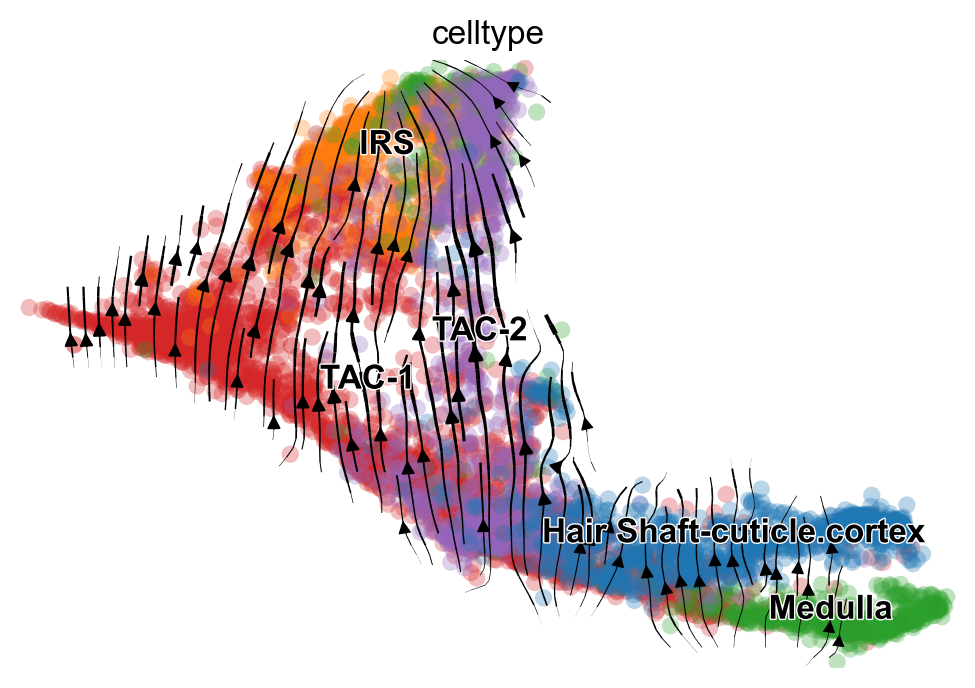

In [6]:
scv.tl.recover_dynamics(adata_rna)
scv.tl.velocity(adata_rna, mode="dynamical")
scv.tl.velocity_graph(adata_rna, n_jobs=1)
scv.tl.latent_time(adata_rna)
scv.pl.velocity_embedding_stream(adata_rna, basis='umap', color='celltype')

In [7]:
# This will take a while. Parallelization is high recommended.

adata_result = mv.recover_dynamics_chrom(adata_rna, 
                                        adata_atac,
                                        max_iter=5, 
                                        init_mode="invert",
                                        parallel=True,
                                        n_jobs = 15,
                                        save_plot=False,
                                        rna_only=False,
                                        fit=True,
                                        n_anchors=500, 
                                        extra_color_key='celltype'
                                        )

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


962 genes will be fitted

running 10 jobs in parallel



  0%|          | 0/962 [00:00<?, ?it/s]

/Users/jake/opt/anaconda3/lib/python3.9/site-packages/umap_learn-0.5.3-py3.9.egg/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/jake/opt/anaconda3/lib/python3.9/site-packages/umap_learn-0.5.3-py3.9.egg/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/jake/opt/anaconda3/lib/python

/Users/jake/opt/anaconda3/lib/python3.9/site-packages/umap_learn-0.5.3-py3.9.egg/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/jake/opt/anaconda3/lib/python3.9/site-packages/umap_learn-0.5.3-py3.9.egg/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/jake/opt/anaconda3/lib/python

5031439G07Rik - predicted partial trajectory: False

5031439G07Rik - predicted trajectory direction:complete

5031439G07Rik - predicted model: 1

5031439G07Rik - initial params:
switch time array = [1.        2.        4.5312482],
rates = [0.34467154 0.27964439 1.         0.85680047],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.854847132304455

5031439G07Rik - initial loss: 0.0007943876461368338

5031439G07Rik - removing gaps and realigning by 1.3003841755935128..

5031439G07Rik - computing likelihood..

5031439G07Rik - likelihood of c: 0.21558874127108035, likelihood of u: 0.4101136958633269, likelihood of s: 0.3905949861736266

5031439G07Rik - computing velocities..

5031439G07Rik - fitted params:
switch time array = [0.31257338 5.27643483 6.07701075],
rates = [0.16665739 0.21403948 0.76900351 0.71396104],
cc scale = 1.232529910961335,
c rescale factor = 0.88044505965101,
u rescale factor = 0.854847132304455

5031439G07Rik - aligning to range (0,20) by 1.016293279022

Cdkal1 - predicted model: 1

Cdkal1 - initial params:
switch time array = [3.         6.         9.90775528],
rates = [0.11220651 0.5685993  1.         1.51494525],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.610490386174608

Cdkal1 - initial loss: 0.0012669505964632692

Cdkal1 - removing gaps and realigning by 1.974080841715543..

Cdkal1 - computing likelihood..

Cdkal1 - likelihood of c: 0.24233701532558316, likelihood of u: 0.3232967556206144, likelihood of s: 0.5194318695976351

Cdkal1 - computing velocities..

Cdkal1 - fitted params:
switch time array = [13.78349948 19.57572538 20.        ],
rates = [0.03862074 0.33731053 1.44666848 0.78030108],
cc scale = 1.0469959734883307,
c rescale factor = 0.9297434366389771,
u rescale factor = 1.3369876577537667

Cdkal1 - aligning to range (0,20) by 3.4652777777777786..

Cdkal1 - final params:
switch time array = [-1.41233159e-02  2.00575484e+01  2.15277778e+01],
rates = [0.01114506 0.09734011 0.41747547 0.22517707],
cc scal

Abcf2 - predicted partial trajectory: True

Abcf2 - predicted trajectory direction:on

Abcf2 - predicted model: 1

Abcf2 - initial params:
switch time array = [1.        2.        4.0862365],
rates = [0.17063962 0.73433762 1.         0.83414086],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.6392596610895964

Abcf2 - initial loss: 0.002330994706780176

Abcf2 - removing gaps and realigning by 4.569597710644742..

Abcf2 - computing likelihood..

Abcf2 - likelihood of c: 0.24696020130563087, likelihood of u: 0.29626160381502475, likelihood of s: 0.9992579452166331

Abcf2 - computing velocities..

Abcf2 - fitted params:
switch time array = [ 9.13251699 19.05571447 20.        ],
rates = [0.01718646 0.16458609 0.53106449 0.10191489],
cc scale = 0.6610482203580695,
c rescale factor = 1.0198847967376892,
u rescale factor = 1.1085351526554952

Abcf2 - aligning to range (0,20) by 1.5306748466257671..

Abcf2 - final params:
switch time array = [ 4.83780975 20.02699853 21.47239264],

4833420G17Rik - predicted partial trajectory: True

4833420G17Rik - predicted trajectory direction:on

4833420G17Rik - predicted model: 1

4833420G17Rik - initial params:
switch time array = [1.       2.       4.210054],
rates = [0.15915632 0.60604229 1.         0.82861879],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.6400352641190188

4833420G17Rik - initial loss: 0.0016991039739823978

4833420G17Rik - removing gaps and realigning by 4.368498099068923..

4833420G17Rik - computing likelihood..

4833420G17Rik - likelihood of c: 0.2558453675307782, likelihood of u: 0.3027678720643666, likelihood of s: 0.8139665666406725

4833420G17Rik - computing velocities..

4833420G17Rik - fitted params:
switch time array = [ 8.00885073 18.98801568 20.        ],
rates = [0.01748722 0.14138468 0.29899359 0.1068895 ],
cc scale = 0.5443982843862457,
c rescale factor = 0.9746501726846957,
u rescale factor = 0.684948377484613

4833420G17Rik - aligning to range (0,20) by 1.827838827838828..

Abcc1 - predicted partial trajectory: True

Abcc1 - predicted trajectory direction:on

Abcc1 - predicted model: 1

Abcc1 - initial params:
switch time array = [3.         6.         9.90775528],
rates = [0.07708061 0.74424519 1.         1.37215599],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.6167722300175195

Abcc1 - initial loss: 0.0011551950033754517

Abcc1 - removing gaps and realigning by 2.057605580199995..

Abcc1 - computing likelihood..

Abcc1 - likelihood of c: 0.2589494896210756, likelihood of u: 0.3158167821445084, likelihood of s: 0.46526495392290196

Abcc1 - computing velocities..

Abcc1 - fitted params:
switch time array = [12.73250982 19.56017425 20.        ],
rates = [0.02549956 0.37467695 0.74900735 0.62657144],
cc scale = 0.5162779837196823,
c rescale factor = 0.9505766895489878,
u rescale factor = 0.8974578477655442

Abcc1 - aligning to range (0,20) by 2.9352941176470595..

Abcc1 - final params:
switch time array = [-0.03810353 20.00309971 21.2941176

Cep164 - final params:
switch time array = [ 7.99035604 20.03376058 21.07981221],
rates = [0.02120587 0.12974618 0.25713115 0.09932609],
cc scale = 0.7043335735106502,
c rescale factor = 1.0209126228771326,
u rescale factor = 0.6636585904963828

Cep164 - final loss: 0.0017607701781248769

Cep164 - final likelihood: 0.0559788168847166

Chd9 - predicted partial trajectory: False

Chd9 - predicted trajectory direction:complete

Chd9 - predicted model: 1

Chd9 - initial params:
switch time array = [3.         6.         9.90775528],
rates = [0.0963336  0.90407761 1.         1.52451828],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.6362051523927555

Chd9 - initial loss: 0.002807728492803318

Chd9 - removing gaps and realigning by 1.007985888792638..

Chd9 - computing likelihood..

Chd9 - likelihood of c: 0.2522305496356247, likelihood of u: 0.4392309316174561, likelihood of s: 0.43403628850794945

Chd9 - computing velocities..

Chd9 - fitted params:
switch time array = [ 3.2

Cers4 - final params:
switch time array = [ 3.99449492  8.62732536 12.65034451],
rates = [0.03444771 0.8026894  0.68796613 0.81770634],
cc scale = 1.0574999999999999,
c rescale factor = 0.9463541666666666,
u rescale factor = 0.6836169583499656

Cers4 - final loss: 0.001562094019632027

Cers4 - final likelihood: 0.0477937663687969

Clk2 - predicted partial trajectory: True

Clk2 - predicted trajectory direction:on

Clk2 - predicted model: 1

Clk2 - initial params:
switch time array = [1. 2. 4.],
rates = [0.18826882 0.544468   1.         0.71745013],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.6718701257306018

Clk2 - initial loss: 0.0017251431031668086

Clk2 - removing gaps and realigning by 4.973880613673765..

Clk2 - computing likelihood..

Clk2 - likelihood of c: 0.23954406952515253, likelihood of u: 0.2728248943730045, likelihood of s: 0.8980001398050917

Clk2 - computing velocities..

Clk2 - fitted params:
switch time array = [ 6.73630155 18.97672488 20.        ],


Cgnl1 - final params:
switch time array = [ 8.90726064 20.01217536 21.19469027],
rates = [0.02572881 0.06069342 0.39348963 0.09013091],
cc scale = 0.8941942454138234,
c rescale factor = 0.9214871477943787,
u rescale factor = 0.87830394044691

Cgnl1 - final loss: 0.00043263169275609814

Cgnl1 - final likelihood: 0.03190432369656036

Cherp - predicted partial trajectory: True

Cherp - predicted trajectory direction:on

Cherp - predicted model: 1

Cherp - initial params:
switch time array = [1. 2. 4.],
rates = [0.15570237 0.53258068 1.         0.68518395],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.6945339788299628

Cherp - initial loss: 0.0012334826806141932

Cherp - removing gaps and realigning by 4.826910112158117..

Cherp - computing likelihood..

Cherp - likelihood of c: 0.23448917904657263, likelihood of u: 0.24538816110960163, likelihood of s: 0.7707392938200652

Cherp - computing velocities..

Cherp - fitted params:
switch time array = [ 4.02964296 18.96813904 20

Cep63 - final params:
switch time array = [-0.08384973 20.02949944 22.64705882],
rates = [0.00675893 0.0509437  0.34991481 0.06586298],
cc scale = 0.685904308672411,
c rescale factor = 0.9553683546254559,
u rescale factor = 1.556013786590026

Cep63 - final loss: 0.0003671594920215268

Cep63 - final likelihood: 0.06621222199265533

Cic - predicted partial trajectory: True

Cic - predicted trajectory direction:on

Cic - predicted model: 1

Cic - initial params:
switch time array = [1. 2. 4.],
rates = [0.22491495 0.35017466 1.         0.72503333],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.6663013345816476

Cic - initial loss: 0.0007824129735989391

Cic - removing gaps and realigning by 4.978179144504097..

Cic - computing likelihood..

Cic - likelihood of c: 0.23547762869178293, likelihood of u: 0.30225636001483175, likelihood of s: 0.986587242310509

Cic - computing velocities..

Cic - fitted params:
switch time array = [ 9.5731334  18.86247777 20.        ],
rates = [0

Cep55 - final params:
switch time array = [ 9.2102075  20.00937816 20.58212058],
rates = [0.03253578 0.22416792 0.9629605  0.35000448],
cc scale = 0.8446835042887466,
c rescale factor = 0.9516885840898481,
u rescale factor = 1.2169952361749088

Cep55 - final loss: 0.0008892100505879346

Cep55 - final likelihood: 0.06594526172807857

Clk3 - predicted partial trajectory: True

Clk3 - predicted trajectory direction:on

Clk3 - predicted model: 1

Clk3 - initial params:
switch time array = [1. 2. 4.],
rates = [0.23806704 0.27919592 1.         0.57639453],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.7816672184313902

Clk3 - initial loss: 0.0009197207849271063

Clk3 - removing gaps and realigning by 5.071761840514313..

Clk3 - computing likelihood..

Clk3 - likelihood of c: 0.23863604123951146, likelihood of u: 0.22586110685860178, likelihood of s: 0.8595368181697622

Clk3 - computing velocities..

Clk3 - fitted params:
switch time array = [ 7.19460804 18.90938073 20.        

Cep290 - final likelihood: 0.06466929237628256

Chm - predicted partial trajectory: True

Chm - predicted trajectory direction:on

Chm - predicted model: 1

Chm - initial params:
switch time array = [3.         4.         9.90775528],
rates = [0.07729027 1.13337324 1.         1.27104764],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.37706166202273866

Chm - initial loss: 0.0007451376477163893

Chm - removing gaps and realigning by 1.9756173340013115..

Chm - computing likelihood..

Chm - likelihood of c: 0.26796357795648956, likelihood of u: 0.2755730217591718, likelihood of s: 0.26107687977188004

Chm - computing velocities..

Chm - fitted params:
switch time array = [ 6.46982198  9.10864305 20.        ],
rates = [0.03422798 0.58290978 0.40454942 0.63633049],
cc scale = 1.005286076230937,
c rescale factor = 0.8061455945221345,
u rescale factor = 0.4495685011262368

Chm - aligning to range (0,20) by 7.676923076923075..

Chm - final params:
switch time array = [ -0.17782

Chd1l - final loss: 0.00039836202262367467

Chd1l - final likelihood: 0.07075415078000907

Chd6 - predicted partial trajectory: False

Chd6 - predicted trajectory direction:complete

Chd6 - predicted model: 1

Chd6 - initial params:
switch time array = [3.         6.         9.90775528],
rates = [0.11559273 0.92076064 1.         1.2970354 ],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.6819630080472632

Chd6 - initial loss: 0.004738974864288646

Chd6 - removing gaps and realigning by 1.4238218402779934..

Chd6 - computing likelihood..

Chd6 - likelihood of c: 0.26621059621961063, likelihood of u: 0.4880641116299545, likelihood of s: 0.4909360920683344

Chd6 - computing velocities..

Chd6 - fitted params:
switch time array = [ 3.99390769 12.32357794 14.0934991 ],
rates = [0.06965836 0.60327994 0.70233506 1.09154699],
cc scale = 0.30950544961471815,
c rescale factor = 0.9810411045998513,
u rescale factor = 0.6819630080472632

Chd6 - aligning to range (0,20) by 1.250626566

Cers3 - final likelihood: 0.00569863554361429

Clspn - predicted partial trajectory: False

Clspn - predicted trajectory direction:complete

Clspn - predicted model: 1

Clspn - initial params:
switch time array = [1.         2.         4.47717398],
rates = [0.17897692 1.00790824 1.         0.84015894],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.7652982036834743

Clspn - initial loss: 0.003527223705182665

Clspn - removing gaps and realigning by 2.2207605685420995..

Clspn - computing likelihood..

Clspn - likelihood of c: 0.23724486892894042, likelihood of u: 0.47417712237401105, likelihood of s: 0.3613006668138676

Clspn - computing velocities..

Clspn - fitted params:
switch time array = [ 3.50445476  8.54077939 10.14088661],
rates = [0.03711197 0.43155895 0.38982474 0.47326984],
cc scale = 1.3003716458183905,
c rescale factor = 1.02513251864734,
u rescale factor = 0.7757499462349914

Clspn - aligning to range (0,20) by 1.002008032128514..

Clspn - final params:
swi

Chd3 - predicted trajectory direction:on

Chd3 - predicted model: 1

Chd3 - initial params:
switch time array = [1.         2.         4.47204167],
rates = [0.17742197 1.34316529 1.         0.79868832],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.8012538840678092

Chd3 - initial loss: 0.01843630062115523

Chd3 - removing gaps and realigning by 4.003777827579518..

Chd3 - computing likelihood..

Chd3 - likelihood of c: 0.24853891283541774, likelihood of u: 0.23520907790844145, likelihood of s: 0.7775942586573421

Chd3 - computing velocities..

Chd3 - fitted params:
switch time array = [ 7.53894514 19.12077398 20.        ],
rates = [0.01793693 0.38850433 0.26642609 0.131781  ],
cc scale = 0.8090837315797474,
c rescale factor = 1.0868678429310505,
u rescale factor = 0.5206058301570782

Chd3 - aligning to range (0,20) by 1.070815450643777..

Chd3 - final params:
switch time array = [ 7.60071594 20.0027172  20.94420601],
rates = [0.01675072 0.36281166 0.24880673 0.12306603]

Erf - fitted params:
switch time array = [ 8.76166978 18.92330073 20.        ],
rates = [0.0232347  0.08161366 0.52198426 0.06195229],
cc scale = 0.5391753321190185,
c rescale factor = 1.01788208761731,
u rescale factor = 1.090444925750436

Erf - aligning to range (0,20) by 1.9645669291338586..

Erf - final params:
switch time array = [ 0.04753237 20.01073648 22.12598425],
rates = [0.01182688 0.04154283 0.2656994  0.03153483],
cc scale = 0.5391753321190185,
c rescale factor = 1.01788208761731,
u rescale factor = 1.090444925750436

Erf - final loss: 0.0010418131176239537

Erf - final likelihood: 0.05995636571569022

Exoc4 - predicted partial trajectory: True

Exoc4 - predicted trajectory direction:on

Exoc4 - predicted model: 1

Exoc4 - initial params:
switch time array = [3.         6.         9.90775528],
rates = [0.10150749 0.49318469 1.         1.62721039],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.6763092566295235

Exoc4 - initial loss: 0.0009490257397284555

Exo

Enox1 - final params:
switch time array = [ 7.5462566  20.0974714  52.40223464],
rates = [0.02810506 0.06216672 0.18749895 1.25912554],
cc scale = 1.0464586686449202,
c rescale factor = 0.8019774935740851,
u rescale factor = 0.5112179052126313

Enox1 - final loss: 0.0001970488722231

Enox1 - final likelihood: 0.00642251345992761

Exoc6 - predicted partial trajectory: True

Exoc6 - predicted trajectory direction:on

Exoc6 - predicted model: 1

Exoc6 - initial params:
switch time array = [1.         4.         5.15111138],
rates = [0.07281859 0.52084859 1.         0.96663062],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.6061990850464737

Exoc6 - initial loss: 0.0004463355670339303

Exoc6 - removing gaps and realigning by 4.246274434943463..

Exoc6 - computing likelihood..

Exoc6 - likelihood of c: 0.24714262814653715, likelihood of u: 0.2880349627682162, likelihood of s: 0.7547389752444538

Exoc6 - computing velocities..

Exoc6 - fitted params:
switch time array = [12.42

Ephb6 - aligning to range (0,20) by 1.1015452538631347..

Ephb6 - final params:
switch time array = [ 9.28802734 20.01322673 21.19205298],
rates = [0.01951809 0.04020401 0.69608005 0.06307022],
cc scale = 0.4207437556973572,
c rescale factor = 0.9063642468316189,
u rescale factor = 1.2275877320248338

Ephb6 - final loss: 0.00019141960379375807

Ephb6 - final likelihood: 0.049834676646688066

Ero1l - predicted partial trajectory: False

Ero1l - predicted trajectory direction:complete

Ero1l - predicted model: 1

Ero1l - initial params:
switch time array = [1.         2.         4.76305175],
rates = [0.21245946 0.30940947 1.         0.89667935],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.7468903374001373

Ero1l - initial loss: 0.00042024514176029857

Ero1l - removing gaps and realigning by 1.7673952750428288..

Ero1l - computing likelihood..

Ero1l - likelihood of c: 0.21871139164571168, likelihood of u: 0.4796322372398656, likelihood of s: 0.21892908593141322

Ero1l - 

Eps15l1 - final params:
switch time array = [-0.03063638 20.12472208 21.8705036 ],
rates = [0.00565767 0.07645439 0.26606133 0.1411938 ],
cc scale = 1.0551109255886102,
c rescale factor = 0.9033725680468103,
u rescale factor = 1.099807159261439

Eps15l1 - final loss: 0.000563603637104881

Eps15l1 - final likelihood: 0.03934438384041508

Fam126b - predicted partial trajectory: True

Fam126b - predicted trajectory direction:on

Fam126b - predicted model: 1

Fam126b - initial params:
switch time array = [1. 2. 4.],
rates = [0.27273794 0.30488643 1.         0.66466736],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.6393481537141419

Fam126b - initial loss: 0.0007012556790225992

Fam126b - removing gaps and realigning by 5.096969965062507..

Fam126b - computing likelihood..

Fam126b - likelihood of c: 0.25105158165497576, likelihood of u: 0.29953775090794077, likelihood of s: 1.5016359877670002

Fam126b - computing velocities..

Fam126b - fitted params:
switch time array = [1

Epha4 - fitted params:
switch time array = [0.94299816 5.14735181 8.78821786],
rates = [0.21026342 0.60117639 0.93520995 1.34993477],
cc scale = 1.025,
c rescale factor = 1.0,
u rescale factor = 0.6759565651969304

Epha4 - aligning to range (0,20) by 1.841328413284133..

Epha4 - final params:
switch time array = [-0.0348484   7.70674743 14.41077753],
rates = [0.11419116 0.32649059 0.50789959 0.73313091],
cc scale = 1.025,
c rescale factor = 1.0,
u rescale factor = 0.6759565651969304

Epha4 - final loss: 0.001413315938949548

Epha4 - final likelihood: 0.044754690530690505

F3 - predicted partial trajectory: True

F3 - predicted trajectory direction:on

F3 - predicted model: 1

F3 - initial params:
switch time array = [3.         6.         9.90775528],
rates = [0.06067543 0.37804179 1.         1.22130594],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.5040009919264852

F3 - initial loss: 0.00022886145786636693

F3 - removing gaps and realigning by 2.165741310371493..

F3 

Ergic2 - final likelihood: 0.04580761417773127

Fam120a - predicted partial trajectory: False

Fam120a - predicted trajectory direction:complete

Fam120a - predicted model: 1

Fam120a - initial params:
switch time array = [3.         6.         9.90775528],
rates = [0.08807654 1.25435223 1.         1.45768605],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.6738396284908519

Fam120a - initial loss: 0.003893518616135581

Fam120a - removing gaps and realigning by 1.0308917910998718..

Fam120a - computing likelihood..

Fam120a - likelihood of c: 0.24798664673021156, likelihood of u: 0.4148200403516358, likelihood of s: 0.49221296242076046

Fam120a - computing velocities..

Fam120a - fitted params:
switch time array = [ 3.24449615  6.35894709 10.12513981],
rates = [0.07783168 1.21438883 0.97190072 1.41400491],
cc scale = 0.9929398148148149,
c rescale factor = 0.9980324074074073,
u rescale factor = 0.6718019973952015

Fam120a - aligning to range (0,20) by 2.169565217391304..



Ext1 - predicted trajectory direction:on

Ext1 - predicted model: 1

Ext1 - initial params:
switch time array = [ 5.          6.         11.90775528],
rates = [0.11363463 0.31085616 1.         1.71893243],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.47055486211443115

Ext1 - initial loss: 0.0005113651164095251

Ext1 - removing gaps and realigning by 1.5008398341696918..

Ext1 - computing likelihood..

Ext1 - likelihood of c: 0.2650596086491109, likelihood of u: 0.41910894229435613, likelihood of s: 0.09364093101319977

Ext1 - computing velocities..

Ext1 - fitted params:
switch time array = [ 1.65125584  7.06676765 20.        ],
rates = [0.18902021 0.19627874 0.66368709 5.46457605],
cc scale = 0.9210414880670625,
c rescale factor = 0.7882010982027472,
u rescale factor = 0.47127507189585893

Ext1 - aligning to range (0,20) by 3.7238805970149254..

Ext1 - final params:
switch time array = [-0.11957713 20.04714221 68.20895522],
rates = [0.05075893 0.05270812 0.17822459 1.

Exo1 - predicted partial trajectory: True

Exo1 - predicted trajectory direction:on

Exo1 - predicted model: 1

Exo1 - initial params:
switch time array = [1.         2.         4.17166836],
rates = [0.16081446 0.4091834  1.         0.80403588],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.7414075815637756

Exo1 - initial loss: 0.0007672042584936131

Exo1 - removing gaps and realigning by 5.34002531421861..

Exo1 - computing likelihood..

Exo1 - likelihood of c: 0.2294006611213694, likelihood of u: 0.2962408139892979, likelihood of s: 0.692657256992824

Exo1 - computing velocities..

Exo1 - fitted params:
switch time array = [ 7.06024243 18.9155253  20.        ],
rates = [0.02568756 0.09116509 0.35757382 0.10847317],
cc scale = 0.9850863719934326,
c rescale factor = 0.8953815502123252,
u rescale factor = 0.9656061560161247

Exo1 - aligning to range (0,20) by 1.059447983014862..

Exo1 - final params:
switch time array = [ 7.47995961 20.04001513 21.18895966],
rates = [0.0

Exoc6b - predicted trajectory direction:on

Exoc6b - predicted model: 1

Exoc6b - initial params:
switch time array = [3.         6.         9.90775528],
rates = [0.07670231 0.67301738 1.         1.32044918],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.6374874440266355

Exoc6b - initial loss: 0.0013137978227654398

Exoc6b - removing gaps and realigning by 2.1216166498188325..

Exoc6b - computing likelihood..

Exoc6b - likelihood of c: 0.25405715349093577, likelihood of u: 0.31354762879344983, likelihood of s: 0.5054406699470083

Exoc6b - computing velocities..

Exoc6b - fitted params:
switch time array = [12.80018154 19.52772751 20.        ],
rates = [0.02501658 0.34723957 0.82803785 0.56665201],
cc scale = 0.599486075471749,
c rescale factor = 0.9208524669845279,
u rescale factor = 1.047901349538994

Exoc6b - aligning to range (0,20) by 2.988023952095809..

Exoc6b - final params:
switch time array = [-0.07610427 20.02596423 21.43712575],
rates = [0.00837228 0.11621044

Ism1 - fitted params:
switch time array = [ 7.12688317 18.84749691 20.        ],
rates = [0.03921743 0.03803623 0.1343517  0.08819981],
cc scale = 0.6452018323489646,
c rescale factor = 0.8303872584645655,
u rescale factor = 0.592407541281305

Ism1 - aligning to range (0,20) by 1.4216524216524218..

Ism1 - final params:
switch time array = [ 3.35132394 20.01396285 21.65242165],
rates = [0.02758581 0.02675494 0.0945039  0.06204034],
cc scale = 0.6452018323489646,
c rescale factor = 0.8303872584645655,
u rescale factor = 0.592407541281305

Ism1 - final loss: 9.945819496433327e-05

Ism1 - final likelihood: 0.007222528005854957

Itpr2 - predicted partial trajectory: False

Itpr2 - predicted trajectory direction:complete

Itpr2 - predicted model: 1

Itpr2 - initial params:
switch time array = [3.         6.         9.90775528],
rates = [0.08378842 0.54188512 1.         1.15947806],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.7215979595026444

Itpr2 - initial loss: 0.0011261

Irx4 - fitted params:
switch time array = [1.17832672 6.77215227 8.70321958],
rates = [0.12112094 0.21458446 0.86278351 1.02673901],
cc scale = 0.9910811261324017,
c rescale factor = 1.1370947370350395,
u rescale factor = 0.7626076422143186

Irx4 - aligning to range (0,20) by 1.0..

Irx4 - final params:
switch time array = [1.17832672 6.77215227 8.70321958],
rates = [0.12112094 0.21458446 0.86278351 1.02673901],
cc scale = 0.9910811261324017,
c rescale factor = 1.1370947370350395,
u rescale factor = 0.7626076422143186

Irx4 - final loss: 0.0003685013586957172

Irx4 - final likelihood: 0.010414484312013412

Katnbl1 - predicted partial trajectory: True

Katnbl1 - predicted trajectory direction:on

Katnbl1 - predicted model: 1

Katnbl1 - initial params:
switch time array = [ 5.          6.         11.90775528],
rates = [0.07486952 0.52986824 1.         1.25742907],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.6143871739491609

Katnbl1 - initial loss: 0.0007238148299781555


Isy1 - fitted params:
switch time array = [ 9.56436812 18.89221893 20.        ],
rates = [0.01747769 0.10974617 0.42685915 0.06533679],
cc scale = 0.5354205230822136,
c rescale factor = 1.01073501412437,
u rescale factor = 0.9450902897363433

Isy1 - aligning to range (0,20) by 2.1508620689655173..

Isy1 - final params:
switch time array = [-0.03181167 20.03110881 22.4137931 ],
rates = [0.0081259  0.05102427 0.19845956 0.03037702],
cc scale = 0.5354205230822136,
c rescale factor = 1.01073501412437,
u rescale factor = 0.9450902897363433

Isy1 - final loss: 0.0007213352351156206

Isy1 - final likelihood: 0.06897372605105423

Itsn1 - predicted partial trajectory: True

Itsn1 - predicted trajectory direction:on

Itsn1 - predicted model: 1

Itsn1 - initial params:
switch time array = [1.         2.         4.66049944],
rates = [0.22913822 0.26715281 1.         0.93663773],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.6704650484803768

Itsn1 - initial loss: 0.00038166743192705

Irx2 - fitted params:
switch time array = [ 2.78388045 17.83783424 20.        ],
rates = [0.06029324 0.08840945 0.19062426 0.05707552],
cc scale = 0.6238129004406727,
c rescale factor = 0.8677071043381569,
u rescale factor = 0.6103143326717855

Irx2 - aligning to range (0,20) by 1.1213483146067416..

Irx2 - final params:
switch time array = [ 3.12169965 20.00242536 22.42696629],
rates = [0.05376852 0.0788421  0.16999558 0.05089901],
cc scale = 0.6238129004406727,
c rescale factor = 0.8677071043381569,
u rescale factor = 0.6103143326717855

Irx2 - final loss: 0.0014844680087658657

Irx2 - final likelihood: 0.06353377315214558

Junb - predicted partial trajectory: True

Junb - predicted trajectory direction:on

Junb - predicted model: 1

Junb - initial params:
switch time array = [1.        2.        4.1342083],
rates = [0.16534404 1.14266587 1.         0.70797976],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.6367537101349965

Junb - initial loss: 0.01689232438830876

Ju

Itpr1 - fitted params:
switch time array = [11.03552479 19.42776033 20.        ],
rates = [0.03078018 0.11449628 0.49983043 0.34271717],
cc scale = 1.044383044167439,
c rescale factor = 0.9104467703537067,
u rescale factor = 0.6980073823984865

Itpr1 - aligning to range (0,20) by 1.03099173553719..

Itpr1 - final params:
switch time array = [11.37753485 20.02986034 20.61983471],
rates = [0.02985492 0.11105451 0.48480547 0.33241505],
cc scale = 1.044383044167439,
c rescale factor = 0.9104467703537067,
u rescale factor = 0.6980073823984865

Itpr1 - final loss: 0.00020720684335990674

Itpr1 - final likelihood: 0.038575309980887734

Kat7 - predicted partial trajectory: True

Kat7 - predicted trajectory direction:on

Kat7 - predicted model: 1

Kat7 - initial params:
switch time array = [3.         6.         9.90775528],
rates = [0.07422581 0.61268002 1.         1.03414666],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.6315608776035195

Kat7 - initial loss: 0.001000710945455

Jag2 - predicted partial trajectory: False

Jag2 - predicted trajectory direction:complete

Jag2 - predicted model: 1

Jag2 - initial params:
switch time array = [3.         6.         9.39238172],
rates = [0.08481994 0.66119776 1.         0.99294237],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.7643825760125786

Jag2 - initial loss: 0.0024527134269671782

Jag2 - removing gaps and realigning by 1.2227831001531353..

Jag2 - computing likelihood..

Jag2 - likelihood of c: 0.28681108082208157, likelihood of u: 0.5164200799489629, likelihood of s: 0.4946677106771251

Jag2 - computing velocities..

Jag2 - fitted params:
switch time array = [ 3.49903308  8.72169578 12.0715163 ],
rates = [0.06024993 0.47594964 0.52859207 0.91988311],
cc scale = 1.2066109380323158,
c rescale factor = 1.0405627257223844,
u rescale factor = 0.5795519332325823

Jag2 - aligning to range (0,20) by 1.0..

Jag2 - final params:
switch time array = [ 3.49903308  8.72169578 12.0715163 ],
rates = [0.0602

Itga3 - final likelihood: 0.05097264347452527

Kctd3 - predicted partial trajectory: True

Kctd3 - predicted trajectory direction:on

Kctd3 - predicted model: 1

Kctd3 - initial params:
switch time array = [1.        2.        4.6956982],
rates = [0.13342963 0.60596456 1.         0.93898062],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.6052372108795624

Kctd3 - initial loss: 0.0005970391487514355

Kctd3 - removing gaps and realigning by 4.479415089175447..

Kctd3 - computing likelihood..

Kctd3 - likelihood of c: 0.2579971662401111, likelihood of u: 0.3149227553560027, likelihood of s: 0.8854964113360367

Kctd3 - computing velocities..

Kctd3 - fitted params:
switch time array = [11.12858123 19.07392174 20.        ],
rates = [0.01350428 0.15215754 0.91799737 0.1710865 ],
cc scale = 0.6807824062292074,
c rescale factor = 1.0282672557348698,
u rescale factor = 1.8117078007436591

Kctd3 - aligning to range (0,20) by 2.5329949238578684..

Kctd3 - final params:
switch time 

Kansl1l - initial params:
switch time array = [3.         6.         9.90775528],
rates = [0.07964945 0.4528042  1.         1.10227032],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.7660934374942405

Kansl1l - initial loss: 0.0010009582664208178

Kansl1l - removing gaps and realigning by 1.018281780839943..

Kansl1l - computing likelihood..

Kansl1l - likelihood of c: 0.21930815073392224, likelihood of u: 0.33277118083333157, likelihood of s: 0.4710021377941069

Kansl1l - computing velocities..

Kansl1l - fitted params:
switch time array = [ 2.40036753 10.21284087 10.43208906],
rates = [0.10346721 0.48549885 0.93980913 1.04696175],
cc scale = 1.0314685127378684,
c rescale factor = 0.9952935023967453,
u rescale factor = 0.6924550269347398

Kansl1l - aligning to range (0,20) by 1.9723320158102766..

Kansl1l - final params:
switch time array = [ 3.39044821 18.7992395  19.23166972],
rates = [0.05245933 0.24615473 0.47649641 0.5308243 ],
cc scale = 1.0314685127378684,
c resc

Itgb5 - final loss: 0.0005382107023841687

Itgb5 - final likelihood: 0.03839217162797567

Jag1 - predicted partial trajectory: False

Jag1 - predicted trajectory direction:complete

Jag1 - predicted model: 1

Jag1 - initial params:
switch time array = [3.         6.         9.90775528],
rates = [0.07930306 5.57804221 1.         1.77425788],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.5589519821470963

Jag1 - initial loss: 0.03501453502702206

Jag1 - removing gaps and realigning by 1.9725253462562595..

Jag1 - computing likelihood..

Jag1 - likelihood of c: 0.24981761527915483, likelihood of u: 0.5440892487709182, likelihood of s: 0.8758517494952321

Jag1 - computing velocities..

Jag1 - fitted params:
switch time array = [ 6.06272327 13.31384587 20.        ],
rates = [0.04281706 2.90351607 0.49814827 0.781428  ],
cc scale = 1.0465035484375789,
c rescale factor = 1.057455460839908,
u rescale factor = 0.4601713267670212

Jag1 - aligning to range (0,20) by 1.2927461139896

Myb - fitted params:
switch time array = [3.09047737 8.12711278 9.35318831],
rates = [0.0751015  0.21660974 0.45457625 0.42178601],
cc scale = 1.08038199956835,
c rescale factor = 1.0979414211386227,
u rescale factor = 0.8400169426258713

Myb - aligning to range (0,20) by 1.0040241448692153..

Myb - final params:
switch time array = [3.022431   8.07933456 9.310344  ],
rates = [0.07480049 0.21574156 0.4527543  0.42009549],
cc scale = 1.08038199956835,
c rescale factor = 1.0979414211386227,
u rescale factor = 0.8400169426258713

Myb - final loss: 0.0019953358047160833

Myb - final likelihood: 0.03682047503143432

Nbea - predicted partial trajectory: True

Nbea - predicted trajectory direction:on

Nbea - predicted model: 1

Nbea - initial params:
switch time array = [3.         4.         9.90775528],
rates = [0.14495686 0.47885069 1.         1.28167973],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.4108205762185057

Nbea - initial loss: 0.0006578653248418472

Nbea - remov

Mtss1 - likelihood of c: 0.23897904525333363, likelihood of u: 0.3876126366425862, likelihood of s: 0.3274860382003181

Mtss1 - computing velocities..

Mtss1 - fitted params:
switch time array = [ 4.5863859  11.11145592 20.        ],
rates = [0.07822412 0.22451603 0.48384484 1.03019846],
cc scale = 1.0052357389009923,
c rescale factor = 0.8428238394817096,
u rescale factor = 0.6011670928949727

Mtss1 - aligning to range (0,20) by 3.0802469135802473..

Mtss1 - final params:
switch time array = [-0.07032986 20.02849693 47.40740741],
rates = [0.02539541 0.07288897 0.15707989 0.33445321],
cc scale = 1.0052357389009923,
c rescale factor = 0.8428238394817096,
u rescale factor = 0.6011670928949727

Mtss1 - final loss: 0.0005350428417655354

Mtss1 - final likelihood: 0.030335456740673887

Myo18a - predicted partial trajectory: False

Myo18a - predicted trajectory direction:complete

Myo18a - predicted model: 1

Myo18a - initial params:
switch time array = [3.         6.         9.90775528],
ra

Mtf2 - fitted params:
switch time array = [ 3.09097525  6.63006154 11.38606334],
rates = [0.05719442 0.92181414 0.97715114 1.26286628],
cc scale = 0.9594907308690279,
c rescale factor = 0.9742946522948082,
u rescale factor = 0.7169625828394093

Mtf2 - aligning to range (0,20) by 1.9192307692307693..

Mtf2 - final params:
switch time array = [-0.0677052   6.72461811 15.85248309],
rates = [0.0298007  0.48030396 0.50913687 0.65800648],
cc scale = 0.9594907308690279,
c rescale factor = 0.9742946522948082,
u rescale factor = 0.7169625828394093

Mtf2 - final loss: 0.0013827091044299822

Mtf2 - final likelihood: 0.043597350957680366

Myo9a - predicted partial trajectory: False

Myo9a - predicted trajectory direction:complete

Myo9a - predicted model: 1

Myo9a - initial params:
switch time array = [1.         2.         7.90775528],
rates = [0.20948379 1.58176567 1.         1.6025833 ],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.6505739147111451

Myo9a - initial loss: 0.00419

Mtbp - fitted params:
switch time array = [12.62920816 19.54148525 20.        ],
rates = [0.01761079 0.31270783 0.86502879 0.40585266],
cc scale = 0.9013332781176829,
c rescale factor = 0.954062210241106,
u rescale factor = 1.0395241387155918

Mtbp - aligning to range (0,20) by 1.0919037199124728..

Mtbp - final params:
switch time array = [12.47696909 20.02451015 20.52516411],
rates = [0.01612852 0.28638773 0.79222075 0.37169271],
cc scale = 0.9013332781176829,
c rescale factor = 0.954062210241106,
u rescale factor = 1.0395241387155918

Mtbp - final loss: 0.0006875059662529274

Mtbp - final likelihood: 0.05856541878608968

Napg - predicted partial trajectory: True

Napg - predicted trajectory direction:on

Napg - predicted model: 1

Napg - initial params:
switch time array = [1. 2. 4.],
rates = [0.17530922 0.45161355 1.         0.72433377],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.6057263300135609

Napg - initial loss: 0.0007069549235028958

Napg - removing gaps an

Mtmr2 - final params:
switch time array = [-0.0734287  20.10941615 23.66197183],
rates = [0.00347791 0.09455431 0.50482232 0.11597818],
cc scale = 1.1594347518847181,
c rescale factor = 0.9254703064624275,
u rescale factor = 2.4357017722319023

Mtmr2 - final loss: 0.0006643035025855237

Mtmr2 - final likelihood: 0.04870073980311576

Myo10 - predicted partial trajectory: False

Myo10 - predicted trajectory direction:complete

Myo10 - predicted model: 1

Myo10 - initial params:
switch time array = [3.         6.         9.90775528],
rates = [0.10803719 1.63119704 1.         1.55377632],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.6420743825144517

Myo10 - initial loss: 0.008390681030886644

Myo10 - removing gaps and realigning by 1.1232653826406056..

Myo10 - computing likelihood..

Myo10 - likelihood of c: 0.2872879281752521, likelihood of u: 0.7786669827292356, likelihood of s: 0.6247782245720772

Myo10 - computing velocities..

Myo10 - fitted params:
switch time array

Mt2 - fitted params:
switch time array = [ 4.32977786 10.51611429 11.03974083],
rates = [0.05959706 1.20739411 0.46792974 0.39220333],
cc scale = 1.0542489498781378,
c rescale factor = 0.9754083887075057,
u rescale factor = 1.160418061304577

Mt2 - aligning to range (0,20) by 1.0..

Mt2 - final params:
switch time array = [ 4.32977786 10.51611429 11.03974083],
rates = [0.05959706 1.20739411 0.46792974 0.39220333],
cc scale = 1.0542489498781378,
c rescale factor = 0.9754083887075057,
u rescale factor = 1.160418061304577

Mt2 - final loss: 0.06842712643182898

Mt2 - final likelihood: 0.042776856944161966

Mylk - predicted partial trajectory: True

Mylk - predicted trajectory direction:on

Mylk - predicted model: 1

Mylk - initial params:
switch time array = [1. 2. 4.],
rates = [0.21207648 0.19374599 1.         0.65359923],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.6239524467283117

Mylk - initial loss: 0.00019925657459875918

Mylk - removing gaps and realigning by 6.10

Nav2 - predicted model: 1

Nav2 - initial params:
switch time array = [3.         6.         9.90775528],
rates = [0.08804384 0.44985395 1.         1.18893653],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.5861334954539998

Nav2 - initial loss: 0.0007658485508956797

Nav2 - removing gaps and realigning by 2.0751837482614213..

Nav2 - computing likelihood..

Nav2 - likelihood of c: 0.25150090553255416, likelihood of u: 0.2912191206309057, likelihood of s: 0.3413115070332782

Nav2 - computing velocities..

Nav2 - fitted params:
switch time array = [ 5.04756163 13.46812789 20.        ],
rates = [0.06653375 0.22121465 0.43726605 0.5714984 ],
cc scale = 1.0009223492251416,
c rescale factor = 0.904596481053374,
u rescale factor = 0.6273799266155777

Nav2 - aligning to range (0,20) by 2.3761904761904766..

Nav2 - final params:
switch time array = [-6.03213267e-03  2.00028372e+01  3.55238095e+01],
rates = [0.02800018 0.09309635 0.18401978 0.24051035],
cc scale = 1.0009223492251

Myh14 - initial params:
switch time array = [1.         4.         7.90775528],
rates = [0.26965132 0.81257356 1.         1.31343767],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.7223816470851215

Myh14 - initial loss: 0.0035036231170528427

Myh14 - removing gaps and realigning by 1.0392375128951548..

Myh14 - computing likelihood..

Myh14 - likelihood of c: 0.24563415384348977, likelihood of u: 0.424855137350191, likelihood of s: 0.4978287246521424

Myh14 - computing velocities..

Myh14 - fitted params:
switch time array = [0.82591849 6.03715711 8.02210541],
rates = [0.27931028 0.75202578 0.99383448 1.25286283],
cc scale = 0.7043766882165654,
c rescale factor = 1.0141970810259266,
u rescale factor = 0.6903973101250329

Myh14 - aligning to range (0,20) by 2.0284552845528454..

Myh14 - final params:
switch time array = [-0.03197834 10.53878616 14.56516505],
rates = [0.13769605 0.37073816 0.48994646 0.6176438 ],
cc scale = 0.7043766882165654,
c rescale factor = 1.0141970

Mtm1 - final loss: 0.0005549088343970093

Mtm1 - final likelihood: 0.0038003993374738985

Naa25 - predicted partial trajectory: False

Naa25 - predicted trajectory direction:complete

Naa25 - predicted model: 1

Naa25 - initial params:
switch time array = [3.         6.         9.90775528],
rates = [0.05737765 1.01857708 1.         1.40040158],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.6364235172804308

Naa25 - initial loss: 0.0014355472297410121

Naa25 - removing gaps and realigning by 1.0329076567116273..

Naa25 - computing likelihood..

Naa25 - likelihood of c: 0.25610300796929164, likelihood of u: 0.4112028442122407, likelihood of s: 0.456448703796523

Naa25 - computing velocities..

Naa25 - fitted params:
switch time array = [ 3.14319311  6.70207341 10.55612351],
rates = [0.05419802 0.97679924 0.9545823  1.48098486],
cc scale = 0.8986693658883301,
c rescale factor = 0.9859244338344398,
u rescale factor = 0.6484301183587537

Naa25 - aligning to range (0,20) by 1.

Nars2 - final likelihood: 0.0074717460505240455

Nfkbia - predicted partial trajectory: False

Nfkbia - predicted trajectory direction:complete

Nfkbia - predicted model: 1

Nfkbia - initial params:
switch time array = [3.         6.         9.90775528],
rates = [0.08892493 1.10119144 1.         1.22420342],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.6049673795196197

Nfkbia - initial loss: 0.0045870688802745595

Nfkbia - removing gaps and realigning by 1.0..

Nfkbia - computing likelihood..

Nfkbia - likelihood of c: 0.2630948708044278, likelihood of u: 0.34642267297065005, likelihood of s: 0.6570925069457797

Nfkbia - computing velocities..

Nfkbia - fitted params:
switch time array = [ 3.16621921  7.89921077 10.43831865],
rates = [0.10067607 1.17301405 1.04736583 1.04057291],
cc scale = 0.8994264551900122,
c rescale factor = 0.9614186995423697,
u rescale factor = 0.5764020568359478

Nfkbia - aligning to range (0,20) by 2.0791666666666666..

Nfkbia - final params:
s

Ppp1r12b - fitted params:
switch time array = [15.00650262 19.64751885 20.        ],
rates = [0.01827767 0.30335559 0.83153594 0.67487057],
cc scale = 0.44543510096113037,
c rescale factor = 0.9069003806309933,
u rescale factor = 0.9057052170379578

Ppp1r12b - aligning to range (0,20) by 4.339130434782608..

Ppp1r12b - final params:
switch time array = [-0.10221907 20.03575572 21.56521739],
rates = [0.00421229 0.06991161 0.19163654 0.15553129],
cc scale = 0.44543510096113037,
c rescale factor = 0.9069003806309933,
u rescale factor = 0.9057052170379578

Ppp1r12b - final loss: 0.0003439198078667737

Ppp1r12b - final likelihood: 0.02460527785622945

Prdm10 - predicted partial trajectory: True

Prdm10 - predicted trajectory direction:on

Prdm10 - predicted model: 1

Prdm10 - initial params:
switch time array = [ 5.          6.         11.90775528],
rates = [0.04545342 0.77058711 1.         1.26236994],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.5283325001677318

Prdm10 - 

Ppig - removing gaps and realigning by 1.040742903548404..

Ppig - computing likelihood..

Ppig - likelihood of c: 0.24961486990730722, likelihood of u: 0.41846390404043526, likelihood of s: 0.7874802754151673

Ppig - computing velocities..

Ppig - fitted params:
switch time array = [ 0.90207943  2.00218907 25.58600405],
rates = [0.09633972 1.45075763 0.75892101 0.83840741],
cc scale = 0.9956803660400722,
c rescale factor = 1.2392002283431003,
u rescale factor = 0.5726897130420391

Ppig - aligning to range (0,20) by 1.0483193277310925..

Ppig - final params:
switch time array = [-2.07192537e-02  1.13254695e+00  2.58559160e+01],
rates = [0.09189921 1.38388905 0.72394069 0.79976338],
cc scale = 0.9956803660400722,
c rescale factor = 1.2392002283431003,
u rescale factor = 0.5726897130420391

Ppig - final loss: 0.0028749792692856235

Ppig - final likelihood: 0.08225610488444669

Prdm1 - predicted partial trajectory: True

Prdm1 - predicted trajectory direction:on

Prdm1 - predicted model: 

Ppp1r21 - fitted params:
switch time array = [10.98437366 18.87594756 20.        ],
rates = [0.01837723 0.11065694 0.60825561 0.11044764],
cc scale = 1.10132425034652,
c rescale factor = 0.9024941856180116,
u rescale factor = 1.4443904141428714

Ppp1r21 - aligning to range (0,20) by 2.5589743589743588..

Ppp1r21 - final params:
switch time array = [-0.09639767 20.0979376  22.97435897],
rates = [0.00718148 0.04324269 0.23769508 0.0431609 ],
cc scale = 1.10132425034652,
c rescale factor = 0.9024941856180116,
u rescale factor = 1.4443904141428714

Ppp1r21 - final loss: 0.00046038300096946694

Ppp1r21 - final likelihood: 0.04374333182720212

Prkcd - predicted partial trajectory: True

Prkcd - predicted trajectory direction:on

Prkcd - predicted model: 1

Prkcd - initial params:
switch time array = [1.         2.         4.36221407],
rates = [0.20059368 0.38097888 1.         0.86212844],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.7634964905364175

Prkcd - initial loss: 0.0

Ppp2r1a - computing velocities..

Ppp2r1a - fitted params:
switch time array = [13.50976406 19.46434902 20.        ],
rates = [0.0224014  0.28827144 2.60013089 0.43132793],
cc scale = 1.0600986453604715,
c rescale factor = 0.9627094846431372,
u rescale factor = 2.3157565930554824

Ppp2r1a - aligning to range (0,20) by 1.32010582010582..

Ppp2r1a - final params:
switch time array = [12.17294251 20.03362477 20.74074074],
rates = [0.0169694  0.21836995 1.96963823 0.32673739],
cc scale = 1.0600986453604715,
c rescale factor = 0.9627094846431372,
u rescale factor = 2.3157565930554824

Ppp2r1a - final loss: 0.0007102785665550229

Ppp2r1a - final likelihood: 0.07469977092487033

Prpf18 - predicted partial trajectory: True

Prpf18 - predicted trajectory direction:on

Prpf18 - predicted model: 1

Prpf18 - initial params:
switch time array = [1.         2.         4.44217384],
rates = [0.20818296 0.56759994 1.         0.89197278],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.6395

Ppp1r12a - fitted params:
switch time array = [ 2.10490256  3.76113386 20.        ],
rates = [0.14925613 0.50655534 0.49401263 0.75082927],
cc scale = 1.1452708596452368,
c rescale factor = 1.015458818344445,
u rescale factor = 0.642881021282629

Ppp1r12a - aligning to range (0,20) by 1.134090909090909..

Ppp1r12a - final params:
switch time array = [-0.29466732  1.58364954 20.        ],
rates = [0.13160861 0.44666202 0.43560232 0.66205387],
cc scale = 1.1452708596452368,
c rescale factor = 1.015458818344445,
u rescale factor = 0.642881021282629

Ppp1r12a - final loss: 0.003427614223675129

Ppp1r12a - final likelihood: 0.05050729441467816

Prkcsh - predicted partial trajectory: True

Prkcsh - predicted trajectory direction:on

Prkcsh - predicted model: 1

Prkcsh - initial params:
switch time array = [1. 2. 4.],
rates = [0.18142616 0.39177865 1.         0.5713923 ],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.7651658571576381

Prkcsh - initial loss: 0.001249902376448672

Ppp1r14c - final loss: 0.0005740732087587031

Ppp1r14c - final likelihood: 0.004671661458278852

Prim2 - predicted partial trajectory: False

Prim2 - predicted trajectory direction:complete

Prim2 - predicted model: 1

Prim2 - initial params:
switch time array = [3.         6.         9.90775528],
rates = [0.07424457 0.38933543 1.         1.04140602],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.7154278906409786

Prim2 - initial loss: 0.00035684307153506387

Prim2 - removing gaps and realigning by 1.4056024274880723..

Prim2 - computing likelihood..

Prim2 - likelihood of c: 0.24553844371625438, likelihood of u: 0.2929642655919057, likelihood of s: 0.4346218606215193

Prim2 - computing velocities..

Prim2 - fitted params:
switch time array = [ 8.52594436 12.96731862 13.27302864],
rates = [0.03541727 0.2774211  0.78417407 0.73163536],
cc scale = 1.032856531528833,
c rescale factor = 0.9499439401252476,
u rescale factor = 0.7759671702293895

Prim2 - aligning to range (0,2

Ppfibp1 - fitted params:
switch time array = [ 3.97981041  8.7761186  14.59928867],
rates = [0.08089698 0.45628918 0.71712041 0.93614516],
cc scale = 1.0112143245111493,
c rescale factor = 1.2120084989134923,
u rescale factor = 0.7795433917111854

Ppfibp1 - aligning to range (0,20) by 1.25062656641604..

Ppfibp1 - final params:
switch time array = [-0.0352747   5.96311574 13.24572693],
rates = [0.06468516 0.36484846 0.57340891 0.74854092],
cc scale = 1.0112143245111493,
c rescale factor = 1.2120084989134923,
u rescale factor = 0.7795433917111854

Ppfibp1 - final loss: 0.002427988050767577

Ppfibp1 - final likelihood: 0.030731853647629977

Prdm2 - predicted partial trajectory: False

Prdm2 - predicted trajectory direction:complete

Prdm2 - predicted model: 1

Prdm2 - initial params:
switch time array = [1.         4.         7.90775528],
rates = [0.10771568 0.70090256 1.         1.00865681],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.6865477750578095

Prdm2 - initial l

Ppfibp2 - final loss: 0.000523723092298085

Ppfibp2 - final likelihood: 0.04370028687601979

Ppp6r2 - predicted partial trajectory: True

Ppp6r2 - predicted trajectory direction:on

Ppp6r2 - predicted model: 1

Ppp6r2 - initial params:
switch time array = [1.         2.         7.90775528],
rates = [0.07783699 1.62819876 1.         1.04209715],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.652275519708805

Ppp6r2 - initial loss: 0.00270310065777557

Ppp6r2 - removing gaps and realigning by 2.6495836115306393..

Ppp6r2 - computing likelihood..

Ppp6r2 - likelihood of c: 0.25949428073055386, likelihood of u: 0.3782492461345847, likelihood of s: 0.40358071951911995

Ppp6r2 - computing velocities..

Ppp6r2 - fitted params:
switch time array = [ 1.62544574  8.81762428 20.        ],
rates = [0.01574271 0.61835188 0.3865032  0.39330601],
cc scale = 0.9186181047731539,
c rescale factor = 0.9391119160570034,
u rescale factor = 0.6666479444117865

Ppp6r2 - aligning to range (0,20)

Ppl - final loss: 0.006526880006356746

Ppl - final likelihood: 0.06443709343912436

Prkdc - predicted partial trajectory: False

Prkdc - predicted trajectory direction:complete

Prkdc - predicted model: 1

Prkdc - initial params:
switch time array = [3.         6.         9.90775528],
rates = [0.09352852 0.85766888 1.         1.19727818],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.7133974212747443

Prkdc - initial loss: 0.00277429852582588

Prkdc - removing gaps and realigning by 1.4892075755868495..

Prkdc - computing likelihood..

Prkdc - likelihood of c: 0.24294182627506028, likelihood of u: 0.4276899535772318, likelihood of s: 0.4870803962533211

Prkdc - computing velocities..

Prkdc - fitted params:
switch time array = [ 4.83443523 11.97629363 15.39896868],
rates = [0.05216406 0.51367899 0.69140037 0.9757985 ],
cc scale = 0.3523682758338301,
c rescale factor = 1.0240975325551642,
u rescale factor = 0.709315667148896

Prkdc - aligning to range (0,20) by 1.3201058

Prpf3 - predicted partial trajectory: True

Prpf3 - predicted trajectory direction:on

Prpf3 - predicted model: 1

Prpf3 - initial params:
switch time array = [1. 2. 4.],
rates = [0.12715036 0.7184626  1.         0.75733612],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.6665478252777797

Prpf3 - initial loss: 0.0013384562103997736

Prpf3 - removing gaps and realigning by 4.866962815660093..

Prpf3 - computing likelihood..

Prpf3 - likelihood of c: 0.24512432892567418, likelihood of u: 0.29634664361341845, likelihood of s: 1.0076981565943786

Prpf3 - computing velocities..

Prpf3 - fitted params:
switch time array = [10.11560859 18.97352559 20.        ],
rates = [0.01372407 0.14808063 0.47913353 0.09382763],
cc scale = 0.5430788676308973,
c rescale factor = 0.9169618699607383,
u rescale factor = 0.983503037405157

Prpf3 - aligning to range (0,20) by 2.2681818181818185..

Prpf3 - final params:
switch time array = [-0.05596051 20.03540577 22.36363636],
rates = [0.00605069 

Slc27a6 - computing velocities..

Slc27a6 - fitted params:
switch time array = [ 5.44131299  7.59156242 12.16535246],
rates = [0.05488906 0.25061186 0.64380662 0.61690291],
cc scale = 1.181229518329882,
c rescale factor = 0.9963066882474356,
u rescale factor = 0.7464902146987626

Slc27a6 - aligning to range (0,20) by 1.0..

Slc27a6 - final params:
switch time array = [ 5.44131299  7.59156242 12.16535246],
rates = [0.05488906 0.25061186 0.64380662 0.61690291],
cc scale = 1.181229518329882,
c rescale factor = 0.9963066882474356,
u rescale factor = 0.7464902146987626

Slc27a6 - final loss: 0.00033479527948132256

Slc27a6 - final likelihood: 0.014797248070465417

Slc39a14 - predicted partial trajectory: False

Slc39a14 - predicted trajectory direction:complete

Slc39a14 - predicted model: 1

Slc39a14 - initial params:
switch time array = [1.         4.         5.01490629],
rates = [0.10968936 0.43419862 1.         0.93383832],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.76

Slc30a1 - computing velocities..

Slc30a1 - fitted params:
switch time array = [ 0.89047195 18.94521109 20.        ],
rates = [0.05793793 0.42557899 0.20937159 0.10558861],
cc scale = 0.6614735406890139,
c rescale factor = 0.8853754520210225,
u rescale factor = 0.5138190476486582

Slc30a1 - aligning to range (0,20) by 1.1113585746102452..

Slc30a1 - final params:
switch time array = [-0.03486524 20.03042391 21.20267261],
rates = [0.05213253 0.3829358  0.18839247 0.09500859],
cc scale = 0.6614735406890139,
c rescale factor = 0.8853754520210225,
u rescale factor = 0.5138190476486582

Slc30a1 - final loss: 0.04077146599375731

Slc30a1 - final likelihood: 0.05920064192218514

Slc4a7 - predicted partial trajectory: False

Slc4a7 - predicted trajectory direction:complete

Slc4a7 - predicted model: 1

Slc4a7 - initial params:
switch time array = [3.         6.         9.90775528],
rates = [0.08422468 0.71264144 1.         1.2584045 ],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor =

Slc16a10 - fitted params:
switch time array = [ 2.52708116 10.01452408 11.39103664],
rates = [0.11565193 0.40109355 0.6242675  0.87389879],
cc scale = 0.7272427948173851,
c rescale factor = 0.972390480113528,
u rescale factor = 0.6581160518311032

Slc16a10 - aligning to range (0,20) by 1.1852731591448933..

Slc16a10 - final params:
switch time array = [ 2.99528147 11.86994659 13.50148998],
rates = [0.09757407 0.33839757 0.52668661 0.73729737],
cc scale = 0.7272427948173851,
c rescale factor = 0.972390480113528,
u rescale factor = 0.6581160518311032

Slc16a10 - final loss: 0.0010540344498153487

Slc16a10 - final likelihood: 0.04549834080316915

Slc44a2 - predicted partial trajectory: True

Slc44a2 - predicted trajectory direction:on

Slc44a2 - predicted model: 1

Slc44a2 - initial params:
switch time array = [1. 2. 4.],
rates = [0.23738306 0.28477805 1.         0.57075527],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.7832203764906256

Slc44a2 - initial loss: 0.001533388

Slc39a6 - predicted partial trajectory: False

Slc39a6 - predicted trajectory direction:complete

Slc39a6 - predicted model: 1

Slc39a6 - initial params:
switch time array = [1.         6.         7.90775528],
rates = [0.12831246 0.68121314 1.         1.02592979],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.791933971478798

Slc39a6 - initial loss: 0.002982194540220782

Slc39a6 - removing gaps and realigning by 1.0984032001663562..

Slc39a6 - computing likelihood..

Slc39a6 - likelihood of c: 0.2499184819692385, likelihood of u: 0.38265102310800764, likelihood of s: 0.46478265058164236

Slc39a6 - computing velocities..

Slc39a6 - fitted params:
switch time array = [1.09791286 8.1896769  8.5058208 ],
rates = [0.14576558 0.60923608 0.75960505 0.92526287],
cc scale = 1.2884575609189453,
c rescale factor = 0.9685447961116729,
u rescale factor = 0.6392820899737519

Slc39a6 - aligning to range (0,20) by 1.7147766323024056..

Slc39a6 - final params:
switch time array = [ 1.607

Snx14 - predicted partial trajectory: True

Snx14 - predicted trajectory direction:on

Snx14 - predicted model: 1

Snx14 - initial params:
switch time array = [1. 2. 4.],
rates = [0.19954612 0.57257889 1.         0.86934699],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.4500008600075554

Snx14 - initial loss: 0.0006764585768355547

Snx14 - removing gaps and realigning by 5.122140790435718..

Snx14 - computing likelihood..

Snx14 - likelihood of c: 0.24360378518996767, likelihood of u: 0.27460676142475465, likelihood of s: 0.5821311677096377

Snx14 - computing velocities..

Snx14 - fitted params:
switch time array = [10.43231222 18.96628329 20.        ],
rates = [0.02634046 0.10399183 0.53811872 0.13207797],
cc scale = 1.0379507877746597,
c rescale factor = 0.9025191331120359,
u rescale factor = 1.187633866561863

Snx14 - aligning to range (0,20) by 2.353773584905661..

Snx14 - final params:
switch time array = [-0.06734058 20.01969511 22.45283019],
rates = [0.01119074 0

Slc37a3 - final params:
switch time array = [-1.33450260e-02  2.00348499e+01  2.15730337e+01],
rates = [0.02099324 0.04755466 0.21013316 0.08653628],
cc scale = 0.9785503268513147,
c rescale factor = 0.8024694915401838,
u rescale factor = 0.9500403513041256

Slc37a3 - final loss: 0.0003823811342300565

Slc37a3 - final likelihood: 0.04131985976464199

Smc2 - predicted partial trajectory: False

Smc2 - predicted trajectory direction:complete

Smc2 - predicted model: 1

Smc2 - initial params:
switch time array = [1.         2.         7.90775528],
rates = [0.18343053 1.55925959 1.         1.04146827],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.7930546860430331

Smc2 - initial loss: 0.007685890453286415

Smc2 - removing gaps and realigning by 1.0580546283325665..

Smc2 - computing likelihood..

Smc2 - likelihood of c: 0.26449981479652995, likelihood of u: 0.4566198547314864, likelihood of s: 0.7421309415520345

Smc2 - computing velocities..

Smc2 - fitted params:
switch t

Slc38a9 - final likelihood: 0.0450184778986782

Smc5 - predicted partial trajectory: False

Smc5 - predicted trajectory direction:complete

Smc5 - predicted model: 1

Smc5 - initial params:
switch time array = [1.         4.         7.90775528],
rates = [0.06901813 1.77449515 1.         1.08191219],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.7408833913795807

Smc5 - initial loss: 0.0036964553482152027

Smc5 - removing gaps and realigning by 1.595394387145297..

Smc5 - computing likelihood..

Smc5 - likelihood of c: 0.24767497227466104, likelihood of u: 0.4198933568103906, likelihood of s: 0.5302321931423175

Smc5 - computing velocities..

Smc5 - fitted params:
switch time array = [ 1.76198576  6.85097204 11.24180584],
rates = [0.0300073  1.13317033 0.65230043 0.66543191],
cc scale = 0.816243639345666,
c rescale factor = 1.2036630458030313,
u rescale factor = 0.7388539654232554

Smc5 - aligning to range (0,20) by 1.0967032967032968..

Smc5 - final params:
switch time a

Slc24a3 - likelihood of c: 0.2721235462638312, likelihood of u: 0.6844127356915227, likelihood of s: 0.06602658830862741

Slc24a3 - computing velocities..

Slc24a3 - fitted params:
switch time array = [ 2.13592368 10.68918788 20.        ],
rates = [ 0.14237433  0.21073077  0.68262306 17.45535474],
cc scale = 0.9690305844591389,
c rescale factor = 0.7716689809109876,
u rescale factor = 0.3112625520930395

Slc24a3 - aligning to range (0,20) by 2.3537735849056607..

Slc24a3 - final params:
switch time array = [-0.06685888 20.06558845 41.98113208],
rates = [0.06048769 0.0895289  0.2900122  7.41590221],
cc scale = 0.9690305844591389,
c rescale factor = 0.7716689809109876,
u rescale factor = 0.3112625520930395

Slc24a3 - final loss: 0.00014199814998600593

Slc24a3 - final likelihood: 0.012297110103911693

Slc7a8 - predicted partial trajectory: False

Slc7a8 - predicted trajectory direction:complete

Slc7a8 - predicted model: 1

Slc7a8 - initial params:
switch time array = [1.         6.     

Slc16a9 - initial params:
switch time array = [1.         2.         4.09646651],
rates = [0.22402637 0.1874312  1.         0.79452918],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.7503146252165982

Slc16a9 - initial loss: 0.00025963699494918537

Slc16a9 - removing gaps and realigning by 5.383585809543005..

Slc16a9 - computing likelihood..

Slc16a9 - likelihood of c: 0.19308842980652438, likelihood of u: 0.2624474876139573, likelihood of s: 0.5789959589852833

Slc16a9 - computing velocities..

Slc16a9 - fitted params:
switch time array = [ 6.47202911 18.86916677 20.        ],
rates = [0.0455923  0.03941432 0.27852117 0.13238579],
cc scale = 1.05309077243133,
c rescale factor = 0.8405434478421927,
u rescale factor = 0.7409772922311837

Slc16a9 - aligning to range (0,20) by 1.0617021276595744..

Slc16a9 - final params:
switch time array = [ 6.87136708 20.03343451 21.23404255],
rates = [0.04294265 0.03712371 0.26233457 0.12469202],
cc scale = 1.05309077243133,
c rescale 

Usp37 - likelihood of c: 0.24561801390102406, likelihood of u: 0.3212915313504514, likelihood of s: 0.6682566977932448

Usp37 - computing velocities..

Usp37 - fitted params:
switch time array = [3.3876061  6.78379592 9.78389467],
rates = [0.04673882 1.19239932 1.44201744 0.97214144],
cc scale = 0.8976567309159571,
c rescale factor = 1.0539860317495076,
u rescale factor = 0.8447622800366763

Usp37 - aligning to range (0,20) by 2.598958333333334..

Usp37 - final params:
switch time array = [-0.04991956  8.77663627 16.57376793],
rates = [0.01798368 0.45879894 0.55484439 0.37405042],
cc scale = 0.8976567309159571,
c rescale factor = 1.0539860317495076,
u rescale factor = 0.8447622800366763

Usp37 - final loss: 0.002293066492756618

Usp37 - final likelihood: 0.052735469162654675

Utrn - predicted partial trajectory: False

Utrn - predicted trajectory direction:complete

Utrn - predicted model: 1

Utrn - initial params:
switch time array = [1.         6.         7.90775528],
rates = [0.1133

Usp3 - initial params:
switch time array = [3.         6.         9.90775528],
rates = [0.07970676 0.85607716 1.         1.53788325],
cc scale = 1.0,
c rescale factor = 1.0,
u rescale factor = 0.679876265457745

Usp3 - initial loss: 0.001724349310412938

Usp3 - removing gaps and realigning by 1.0141347643458605..

Usp3 - computing likelihood..

Usp3 - likelihood of c: 0.25816883457788214, likelihood of u: 0.5862622440752941, likelihood of s: 0.4431361426157127

Usp3 - computing velocities..

Usp3 - fitted params:
switch time array = [3.2512947  6.52682999 8.81909416],
rates = [0.07880018 0.84434207 0.9170637  2.04468437],
cc scale = 1.1795525125366124,
c rescale factor = 0.9345892624591472,
u rescale factor = 0.6520437876530386

Usp3 - aligning to range (0,20) by 2.3537735849056607..

Usp3 - final params:
switch time array = [-0.08303747  7.62683098 13.02230182],
rates = [0.03347823 0.35871847 0.38961424 0.86868354],
cc scale = 1.1795525125366124,
c rescale factor = 0.9345892624591472,

In [8]:
# Save the result for use later on
adata_result.write("multivelo_result_fig4.h5ad")

In [9]:
h5ad_url = "https://figshare.com/ndownloader/files/40064263"
adata_result = sc.read("multivelo_result_fig4.h5ad", backup_url = h5ad_url)

In [10]:
print(adata_result)

AnnData object with n_obs × n_vars = 6436 × 960
    obs: 'celltype', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'mean', 'std', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'velocity_genes', 'fit_alpha_c', 'fit_t_sw1', 'fit_t_sw2', 'fit_t_sw3', 'fit_scale_cc', 'fit_rescale_c', 'fit_rescale_u', 'fit_model', 'fit_direction', 'fit_loss', 'fit_likelihood_c', 'fit_ssd_c', 'fit_var_c', 'fit_c

## Computing velocity stream and latent time

In [11]:
mv.velocity_graph(adata_result)
mv.latent_time(adata_result)

computing velocity graph (using 1/10 cores)


  0%|          | 0/6436 [00:00<?, ?cells/s]

    finished (0:00:10) --> added 
    'velo_s_norm_graph', sparse matrix with cosine correlations (adata.uns)
computing latent time using root_cells as prior
    finished (0:00:01) --> added 
    'latent_time', shared time (adata.obs)


## Fig 4a

computing velocity embedding
    finished (0:00:01) --> added
    'velo_s_norm_umap', embedded velocity vectors (adata.obsm)


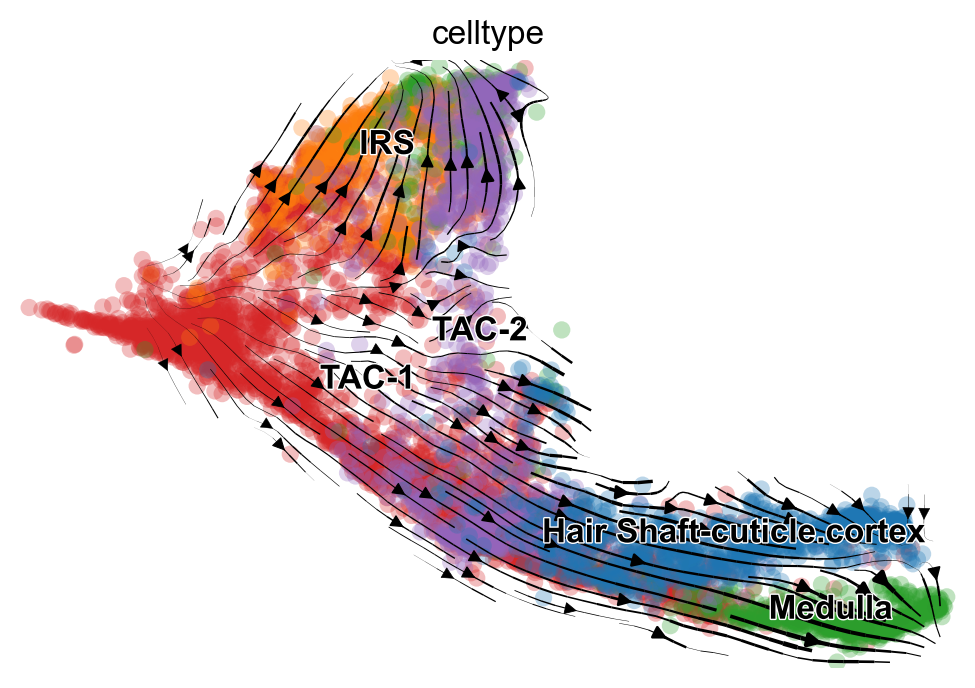

In [12]:
mv.velocity_embedding_stream(adata_result, basis='umap', color='celltype', show=True)

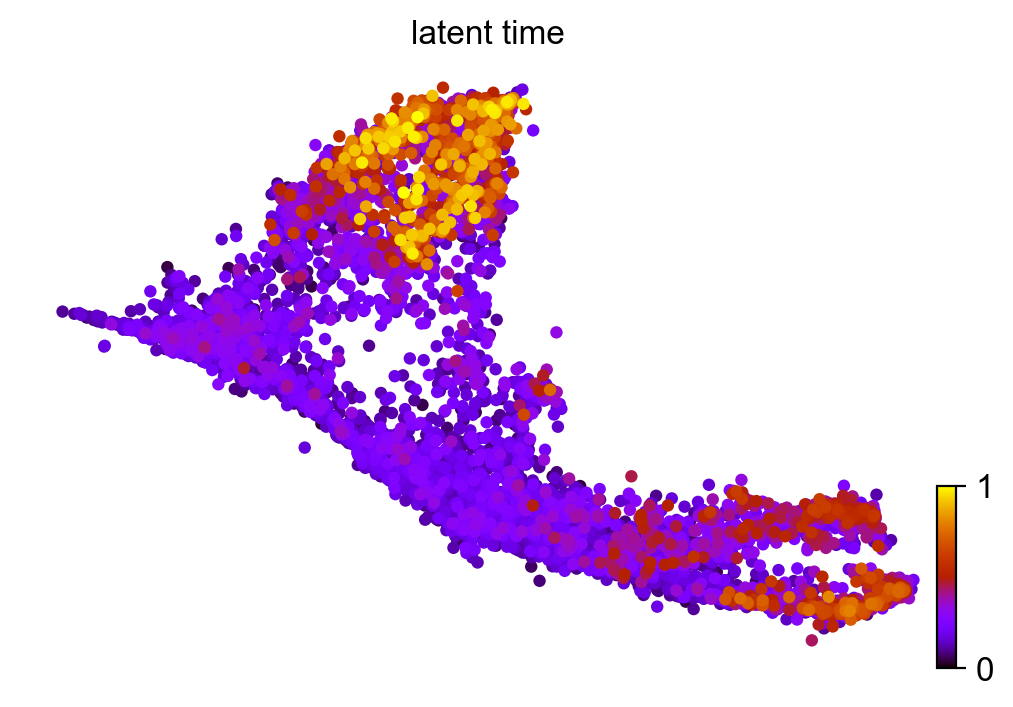

In [13]:
scv.pl.scatter(adata_result, color='latent_time', color_map='gnuplot', size=80)

## Fig 4b

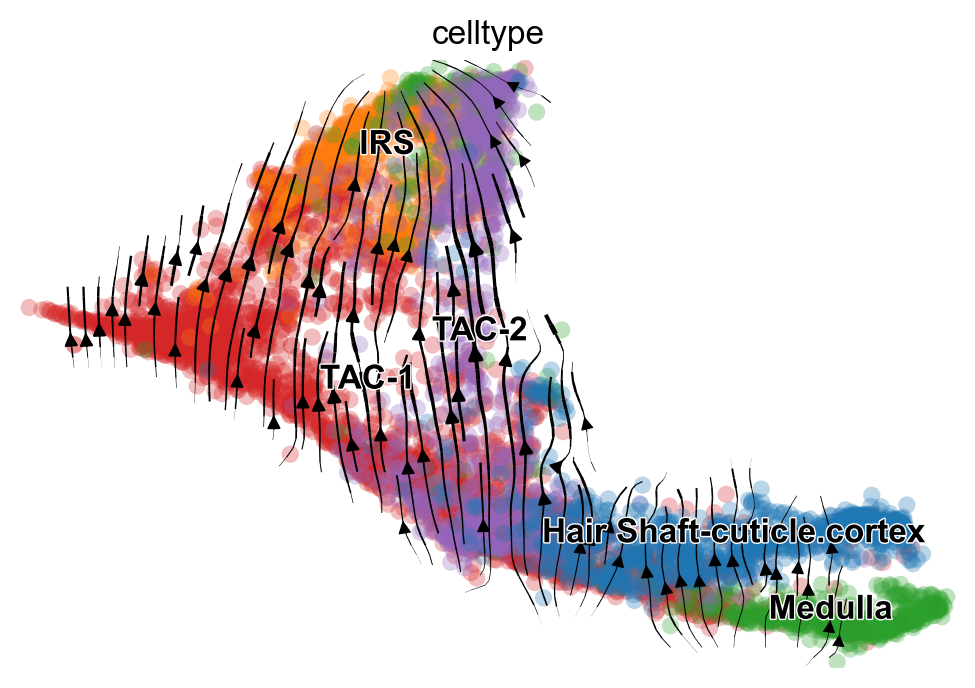

In [14]:
scv.pl.velocity_embedding_stream(adata_result, basis='umap', color='celltype')

## Fig 4c

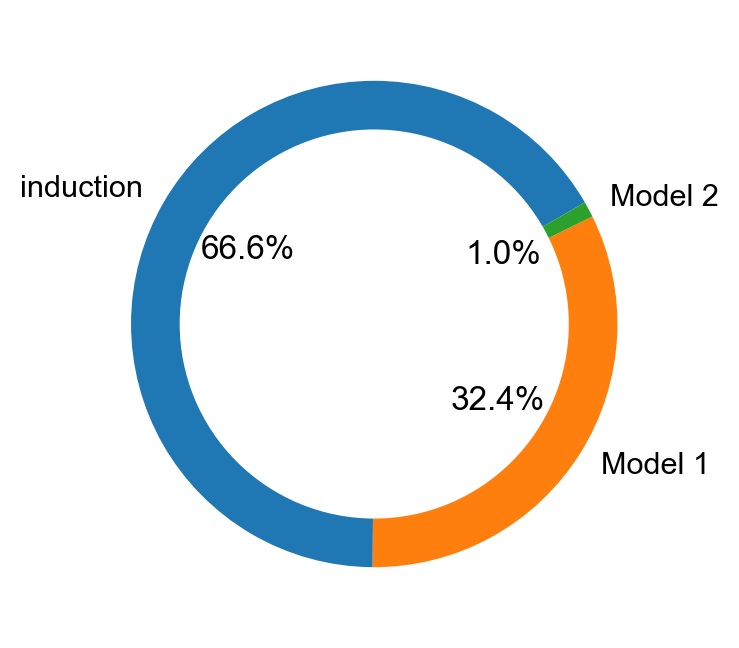

In [15]:
mv.pie_summary(adata_result)

## Fig 4d

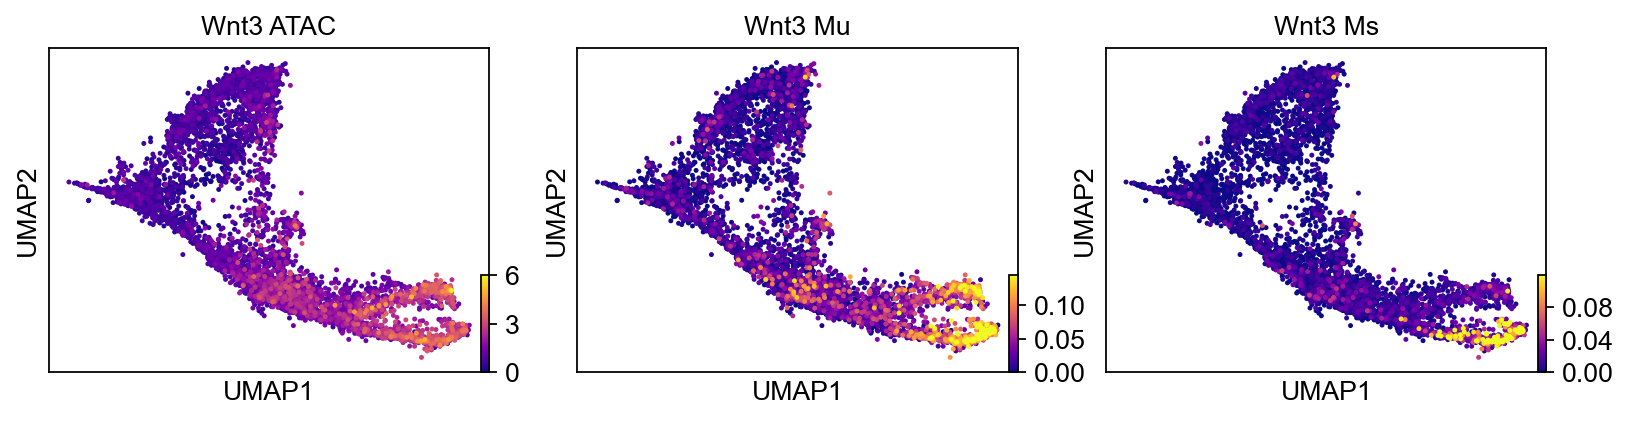

In [16]:
layers = ["ATAC", "Mu", "Ms"]

gene="Wnt3"

titles = []
for layer in layers:
    titles.append(gene + " " + layer)
scv.pl.scatter(adata_result, color=gene, layer=layers, color_map="plasma", size=20, frameon=True, title=titles)

## Fig 4e

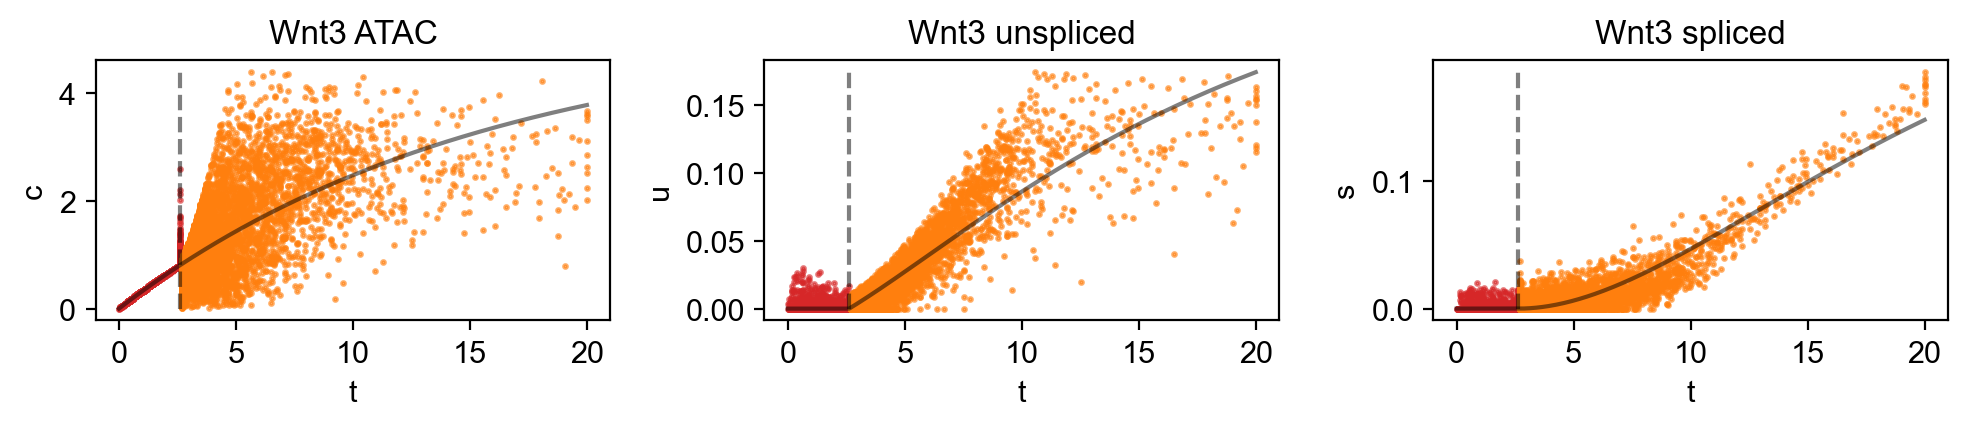

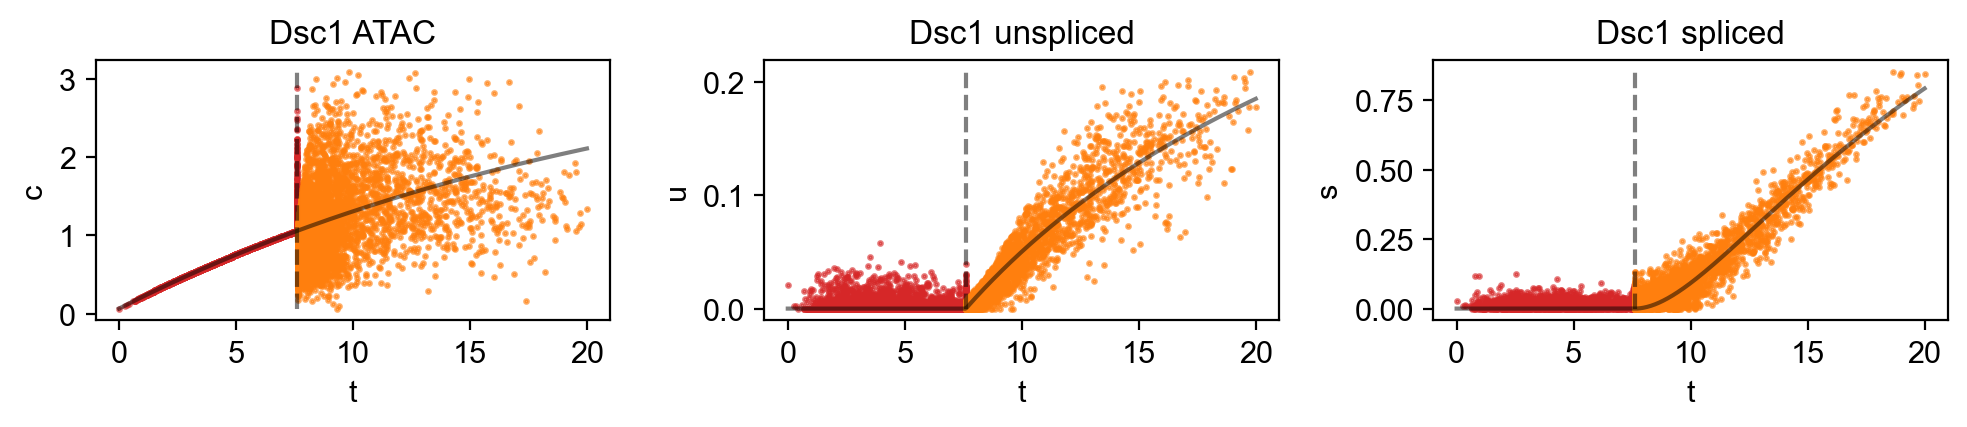

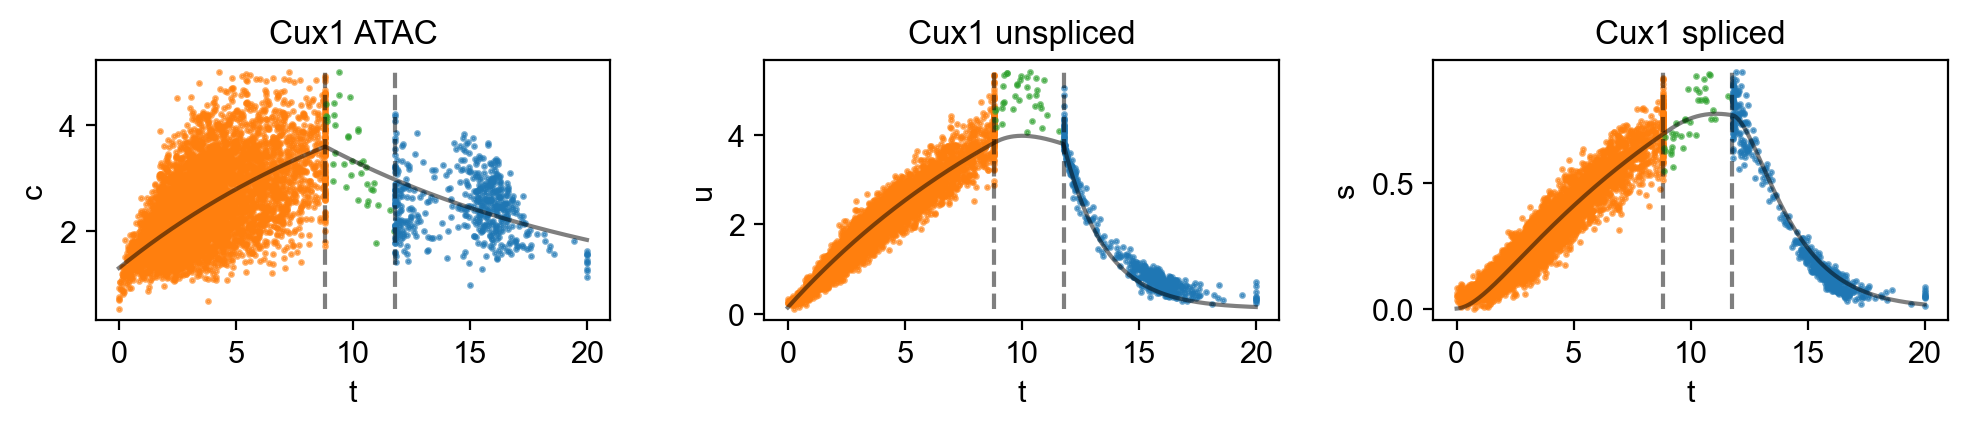

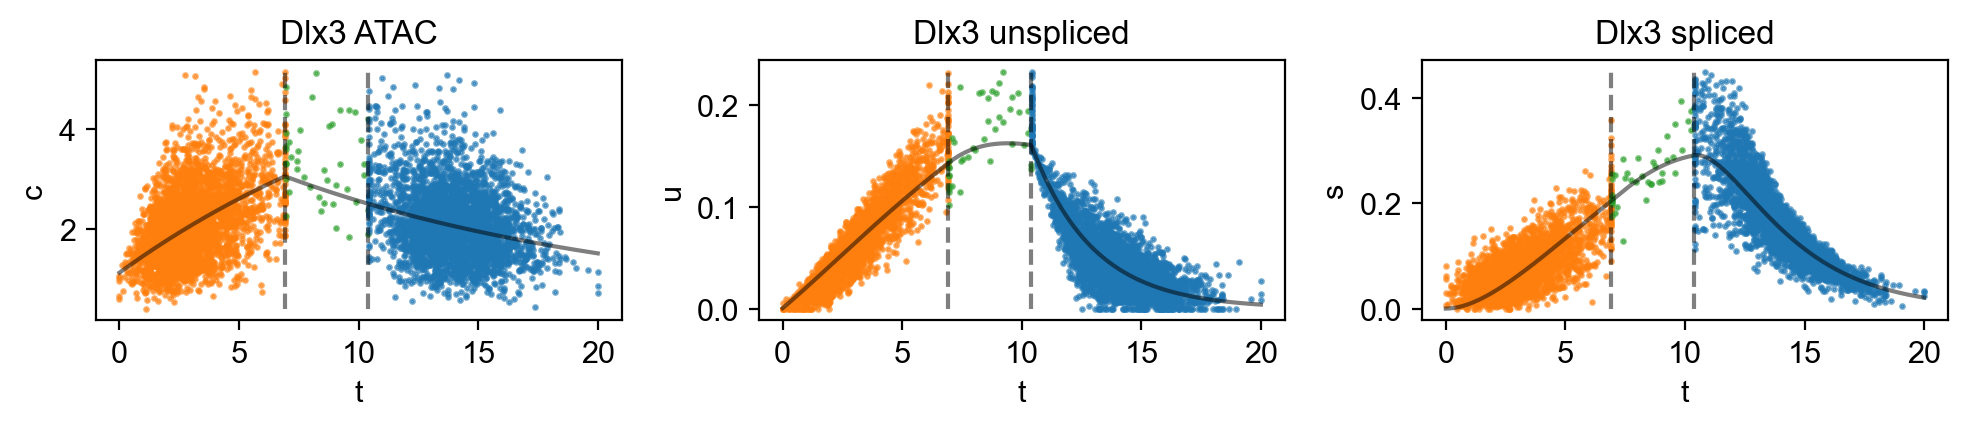

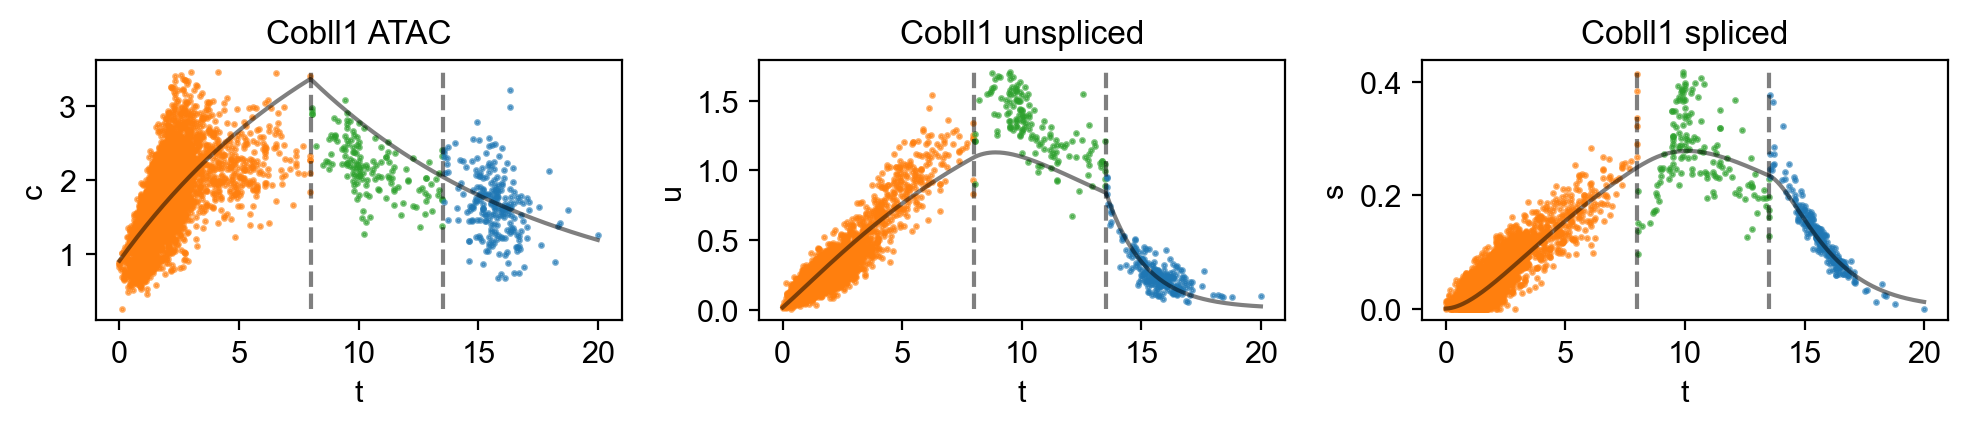

In [17]:
genes = ["Wnt3", "Dsc1", "Cux1", "Dlx3", "Cobll1"]

for gene in genes:
    mv.dynamic_plot(adata_result, genes=gene, color_by="state")

## Fig 4f

In [18]:
from pandas import DataFrame

# preprocess the data before we perform Dynamic Time Warping

# arr = an array of non-time data
# time = time data
# bins = the number of bins we want to put the data into
def preprocess(arr, time, bins):
    
    # normalize the time data
    new_time = time / max(time)
    
    # multiply the time data by the number of bins we want
    new_time = new_time*bins
    
    # make an arrow of the time data converted into integer bins
    arr_window = np.floor(new_time)
    
    # group our non-time data into our time bins and take the mean
    df = DataFrame({'arr': arr, 'window': arr_window})
    arr_df = df.groupby(['window'], group_keys=False).mean()
    
    # our binned data
    arr2 = np.array(arr_df['arr'])
    
    # our time bins
    arr_t = np.arange(-1, bins, 1)
    
    # normalize our non-time data
    arr_vec = arr2 - min(arr2)
    arr_vec = arr_vec / max(arr_vec)
    
    return arr_t, arr_vec

In [19]:
bins = 20

# get the c, u, and s data
c = np.array(adata_result[:, "Wnt3"].layers["ATAC"])[:,0]
u = np.array(adata_result[:, "Wnt3"].layers["Mu"])[:,0]
s = np.array(adata_result[:, "Wnt3"].layers["Ms"])[:,0]

# get our time data
t = np.array(adata_result[:, "Wnt3"].layers["fit_t"])[:,0]

# do preprocessing steps
ct, c_a = preprocess(c, t, bins)
ut, u_a = preprocess(u, t, bins)
st, s_a = preprocess(s, t, bins)

<AxesSubplot:xlabel='Index', ylabel='Query value'>

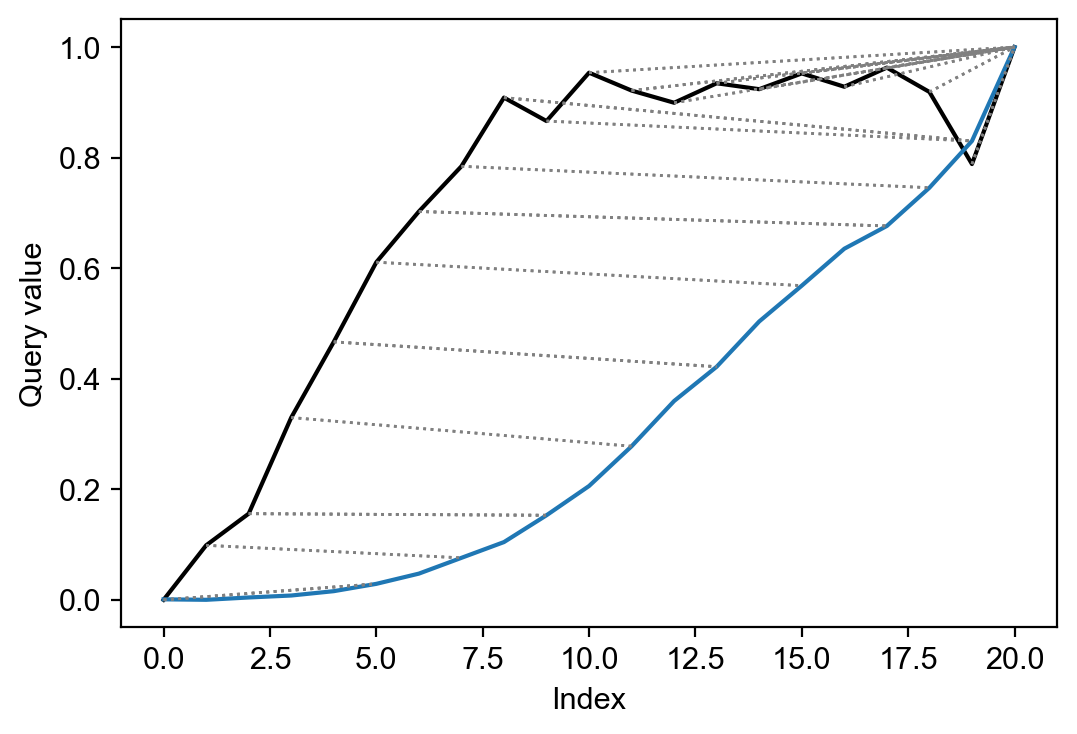

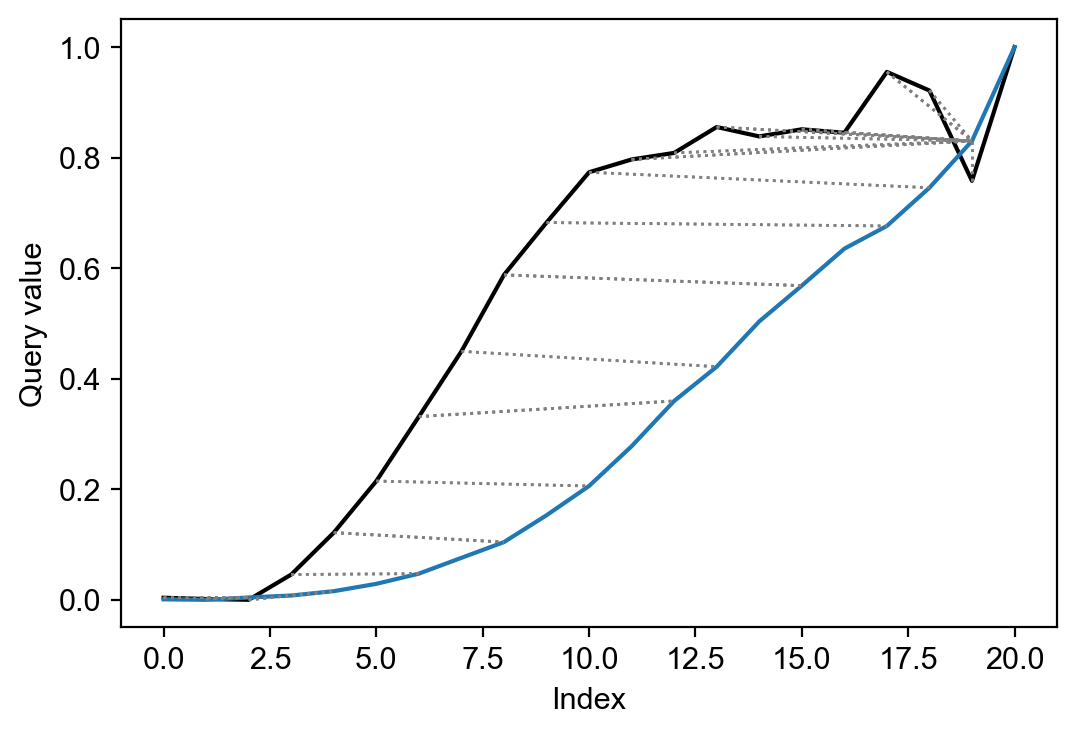

In [20]:
# perform DTW for the data and plot
cs_aligned = dtw(c_a, s_a, keep_internals=True, open_end=True, open_begin=True, step_pattern="asymmetric")
cs_aligned.plot(type="twoway", label=["c", "s"])

us_aligned = dtw(u_a, s_a, keep_internals=True, open_end=True, open_begin=True, step_pattern="asymmetric")
us_aligned.plot(type="twoway")

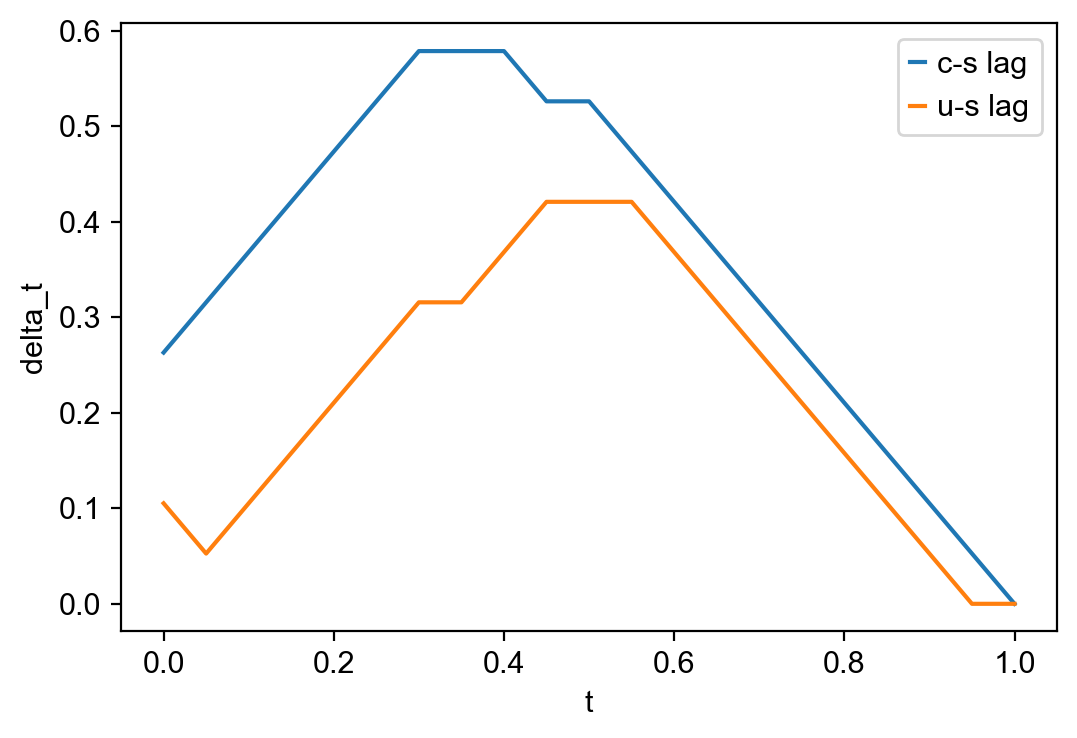

In [21]:
# get the indeces for matching our c values to the s values in our cs plot
c_pts = cs_aligned.index1
cs_pts = cs_aligned.index2 # <- s values for the cs plot

# get the indeces for matching our u values to the s values in our us plot
u_pts = us_aligned.index1
us_pts = us_aligned.index2 # <- s values for the us plot

# normalize the time data for c, s, and u
ct_norm = ct / max(ct)
st_norm = st / max(st)
ut_norm = ut / max(ut)

# subtract the time values for the aligned points on the two graphs
cs_lag = st_norm[cs_pts] - ct_norm[c_pts]
us_lag = st_norm[us_pts] - ut_norm[u_pts]

# corresponding time values for each delta t on the graph
graph_t = np.linspace(0, 1, num=21)

# plot
plt.plot(graph_t, cs_lag, label="c-s lag")
plt.plot(graph_t, us_lag, label="u-s lag")
plt.ylabel("delta_t")
plt.xlabel("t")
plt.legend()